# Import des librairies

In [1]:
#Data analytics
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-pastel') 

In [2]:
#!pip install pyarrow
#!pip install fastparquet

# Import des données

In [3]:
df = pd.read_parquet('dataset\\est_hourly.parquet')

# Analyse descriptive des données

#### Aperçu rapide des données

In [4]:
df.head()

AEP  COMED  DAYTON  DEOK  DOM  DUQ  EKPC  FE  NI  PJME  \
Datetime                                                                      
1998-12-31 01:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   
1998-12-31 02:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   
1998-12-31 03:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   
1998-12-31 04:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   
1998-12-31 05:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   

                     PJMW  PJM_Load  
Datetime                             
1998-12-31 01:00:00   NaN   29309.0  
1998-12-31 02:00:00   NaN   28236.0  
1998-12-31 03:00:00   NaN   27692.0  
1998-12-31 04:00:00   NaN   27596.0  
1998-12-31 05:00:00   NaN   27888.0

In [5]:
df.tail()

AEP    COMED  DAYTON    DEOK      DOM     DUQ  \
Datetime                                                                 
2018-01-01 20:00:00  21089.0  13858.0  2732.0  4426.0  18418.0  1962.0   
2018-01-01 21:00:00  20999.0  13758.0  2724.0  4419.0  18567.0  1940.0   
2018-01-01 22:00:00  20820.0  13627.0  2664.0  4355.0  18307.0  1891.0   
2018-01-01 23:00:00  20415.0  13336.0  2614.0  4224.0  17814.0  1820.0   
2018-01-02 00:00:00  19993.0  12816.0  2552.0  4100.0  17428.0  1721.0   

                       EKPC      FE  NI     PJME    PJMW  PJM_Load  
Datetime                                                            
2018-01-01 20:00:00  2866.0  9378.0 NaN  44284.0  8401.0       NaN  
2018-01-01 21:00:00  2846.0  9255.0 NaN  43751.0  8373.0       NaN  
2018-01-01 22:00:00  2883.0  9044.0 NaN  42402.0  8238.0       NaN  
2018-01-01 23:00:00  2880.0  8676.0 NaN  40164.0  7958.0       NaN  
2018-01-02 00:00:00  2846.0  8393.0 NaN  38608.0  7691.0       NaN

#### Dimensions du dataset

In [6]:
df.shape

(178262, 12)

#### Types des colonnes 

In [7]:
df.dtypes

AEP         float64
COMED       float64
DAYTON      float64
DEOK        float64
DOM         float64
DUQ         float64
EKPC        float64
FE          float64
NI          float64
PJME        float64
PJMW        float64
PJM_Load    float64
dtype: object

#### Statistiques descriptives

In [8]:
df.describe()

AEP         COMED         DAYTON          DEOK  \
count  121273.000000  66497.000000  121275.000000  57739.000000   
mean    15499.513717  11420.152112    2037.851140   3105.096486   
std      2591.399065   2304.139517     393.403153    599.859026   
min      9581.000000   7237.000000     982.000000    907.000000   
25%     13630.000000   9780.000000    1749.000000   2687.000000   
50%     15310.000000  11152.000000    2009.000000   3013.000000   
75%     17200.000000  12510.000000    2279.000000   3449.000000   
max     25695.000000  23753.000000    3746.000000   5445.000000   

                 DOM            DUQ          EKPC            FE            NI  \
count  116189.000000  119068.000000  45334.000000  62874.000000  58450.000000   
mean    10949.203625    1658.820296   1464.218423   7792.159064  11701.682943   
std      2413.946569     301.740640    378.868404   1331.268006   2371.498701   
min      1253.000000    1014.000000    514.000000      0.000000   7003.000000   
25%      9322.000000    1444.000000   1185.000000   6807.000000   9954.000000   
50%     10501.000000    1630.000000   1386.000000   7700.000000  11521.000000   
75%     12378.000000    1819.000000   1699.000000   8556.000000  12896.750000   
max     21651.000000    3054.000000   3490.000000  14032.000000  23631.000000   

                PJME           PJMW      PJM_Load  
count  145366.000000  143206.000000  32896.000000  
mean    32080.222831    5602.375089  29766.427408  
std      6464.012166     979.142872   5849.769954  
min     14544.000000     487.000000  17461.000000  
25%     27573.000000    4907.000000  25473.000000  
50%     31421.000000    5530.000000  29655.000000  
75%     35650.000000    6252.000000  33073.250000  
max     62009.000000    9594.000000  54030.000000

#### Corrélation entre les consommations d'énergie par compagnie

<AxesSubplot:>

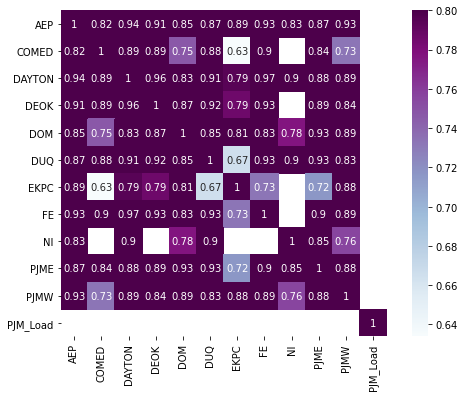

In [9]:
# Pairwise Pearson correlations
correlations = df.corr(method='pearson')
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(correlations,vmax=.8,square=True,cmap="BuPu", annot = True)

###  Analyse visuelle des données (distribution, densité, outliers)

#### Distribution des données et corrélation

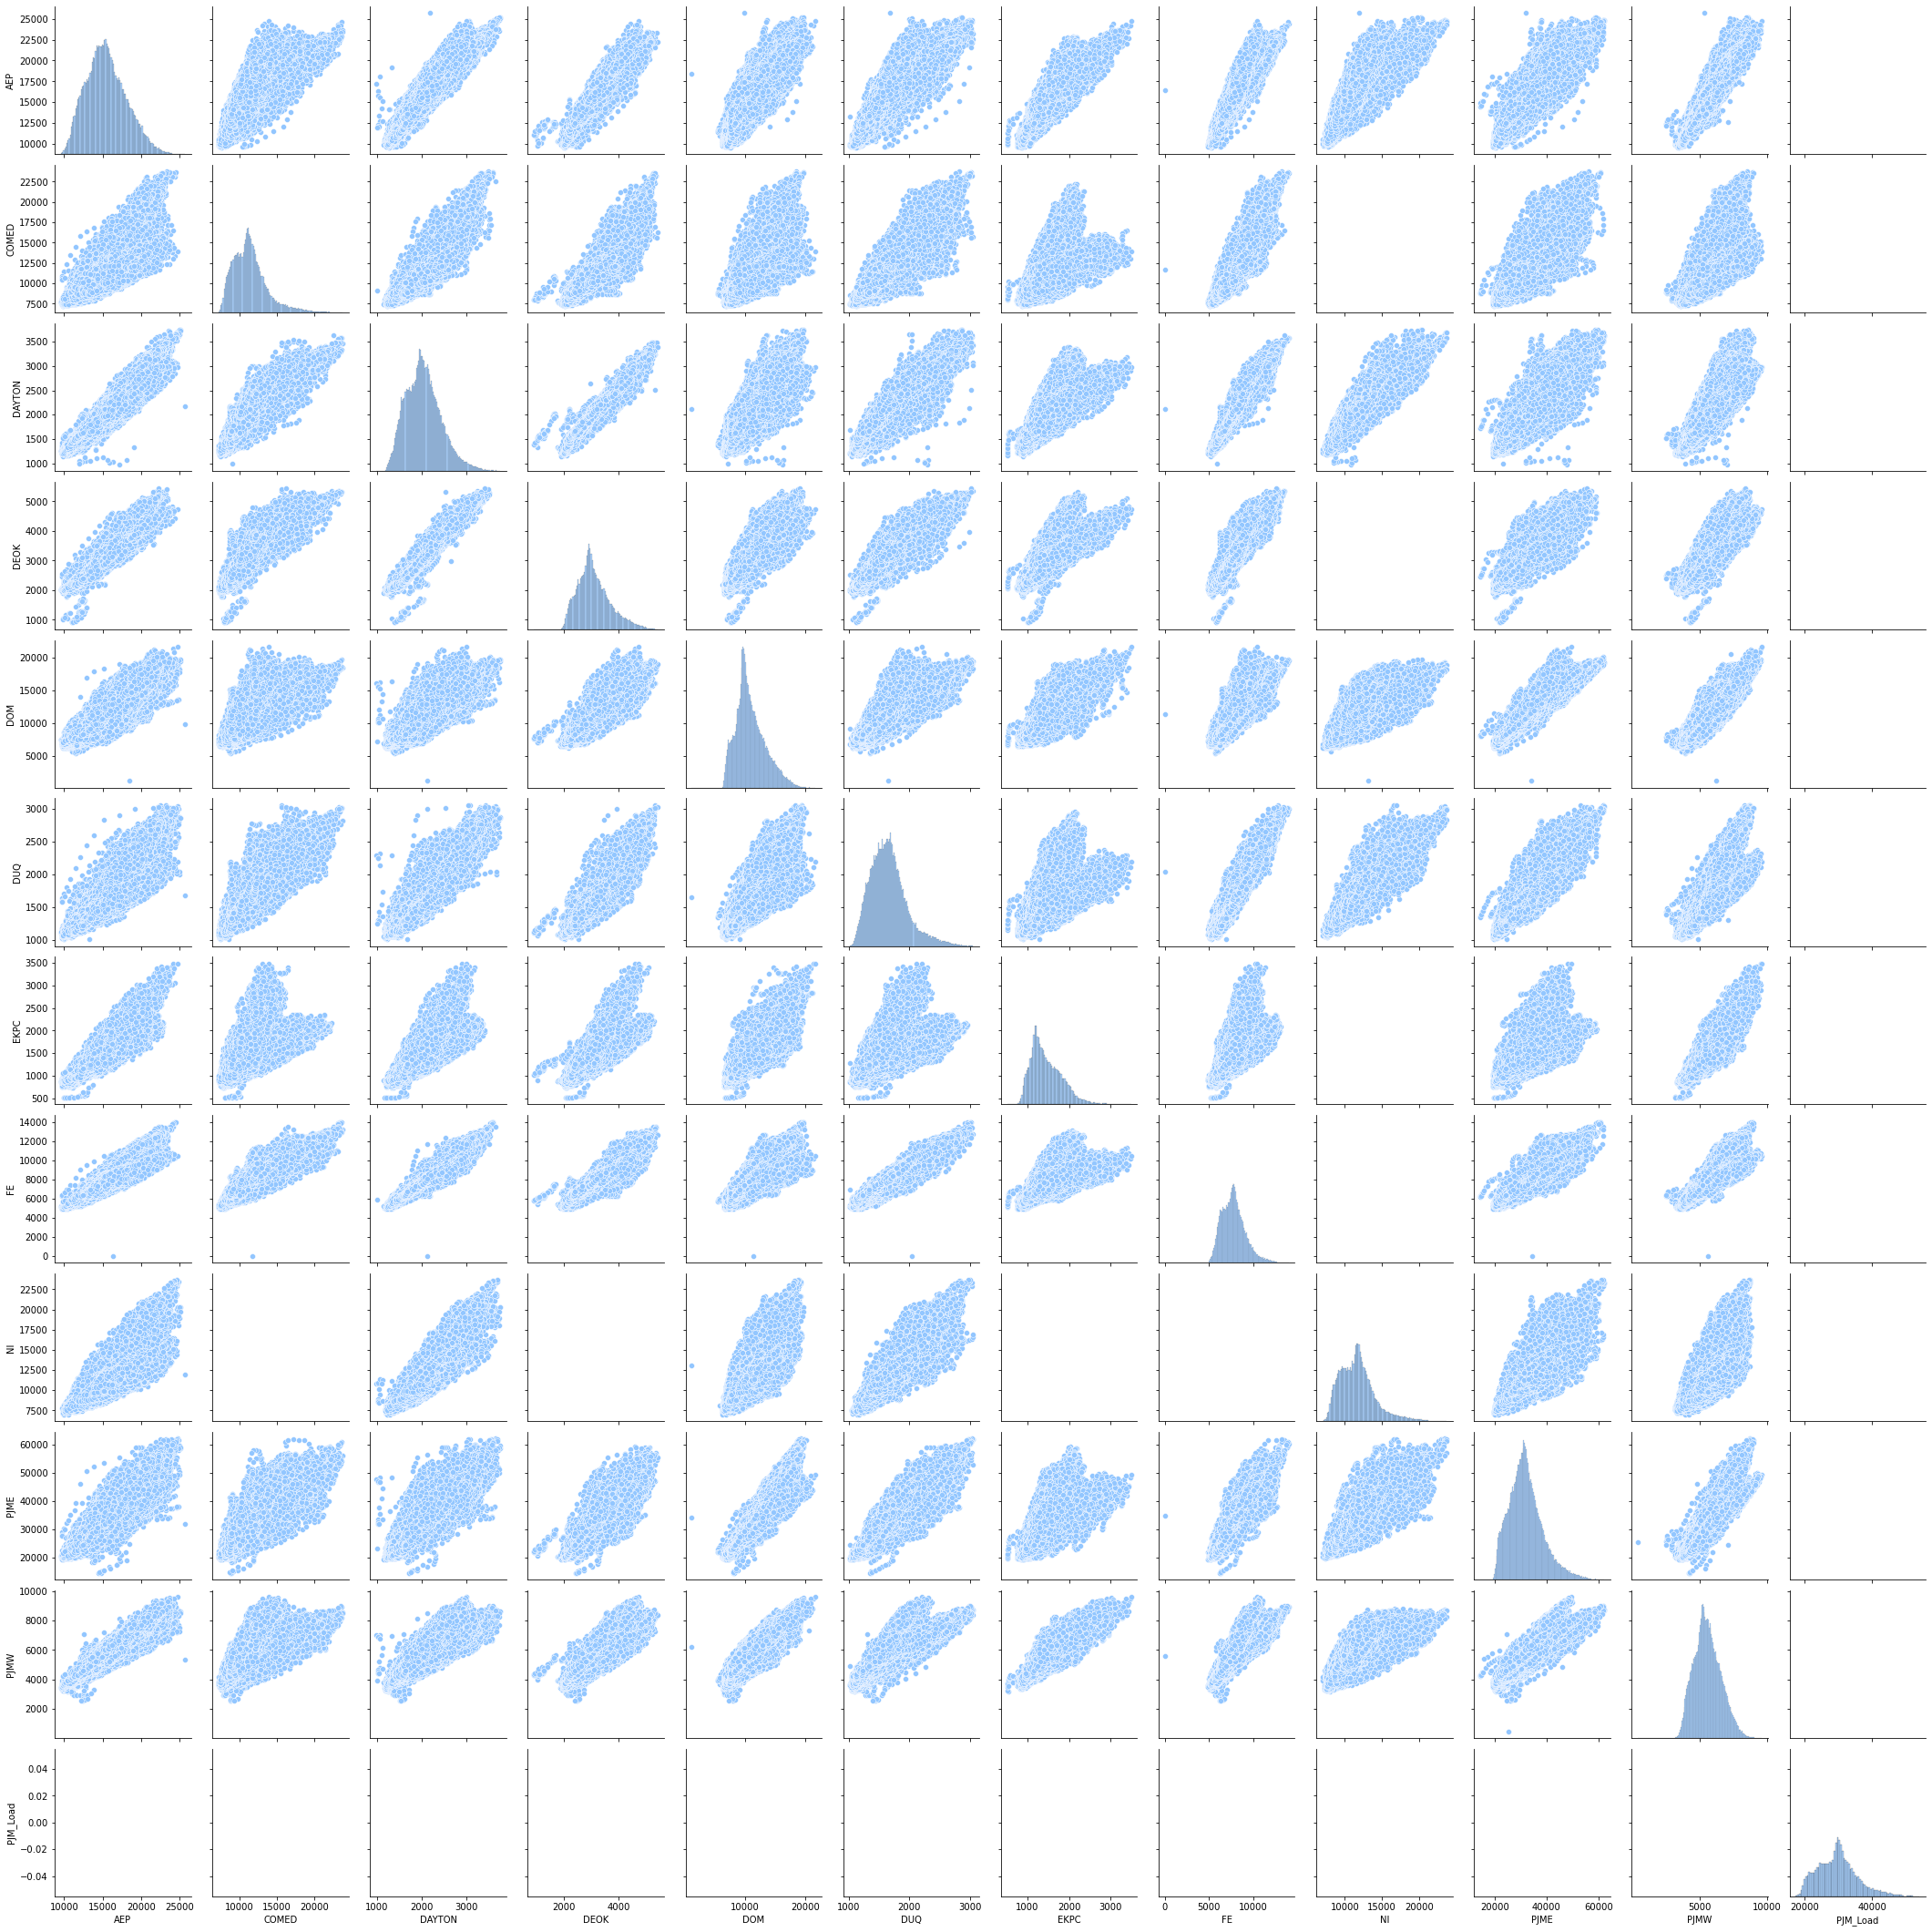

In [10]:
#Seaborn pairplot
sns.pairplot(df)

#### Analyse de l'assymétrie des distributions

In [11]:
skew = df.skew()
print(skew)

AEP         0.378998
COMED       1.161846
DAYTON      0.523796
DEOK        0.676583
DOM         0.698117
DUQ         0.851328
EKPC        0.948599
FE          0.664220
NI          0.972439
PJME        0.739012
PJMW        0.334853
PJM_Load    0.557544
dtype: float64


#### Analyse des outliers

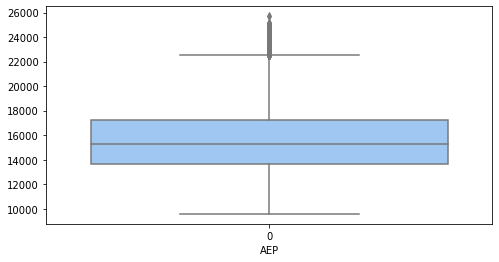

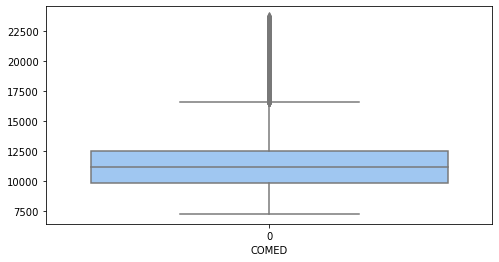

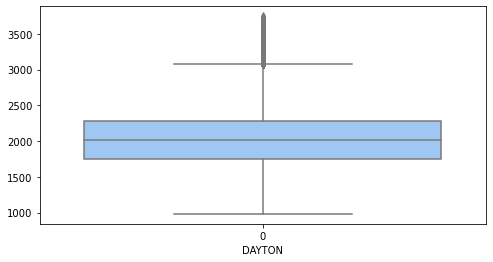

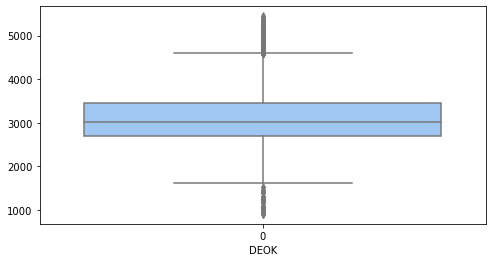

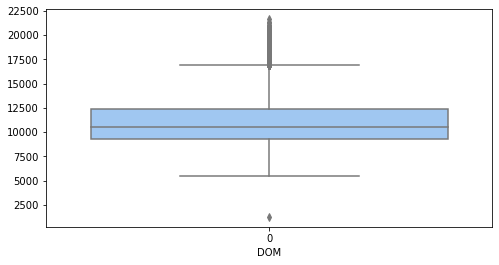

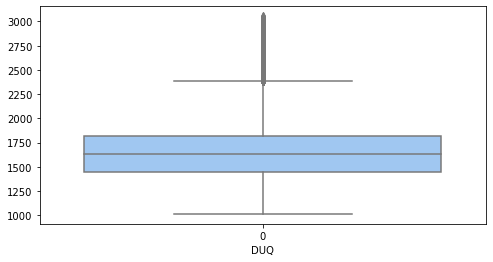

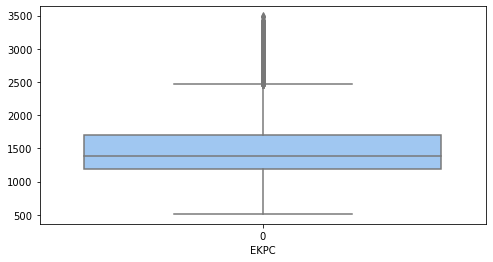

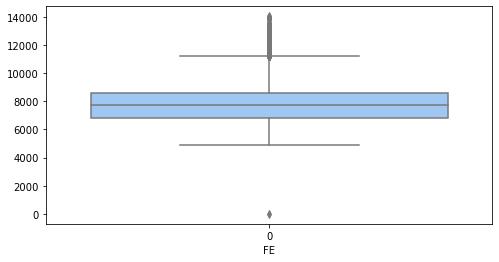

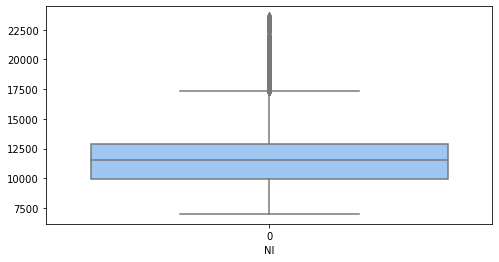

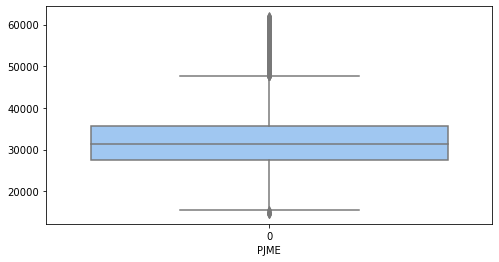

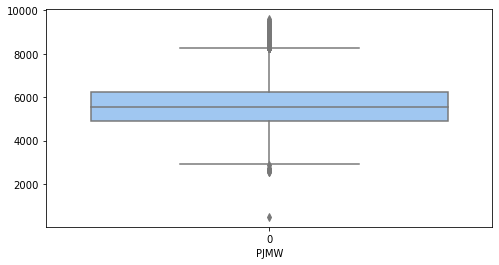

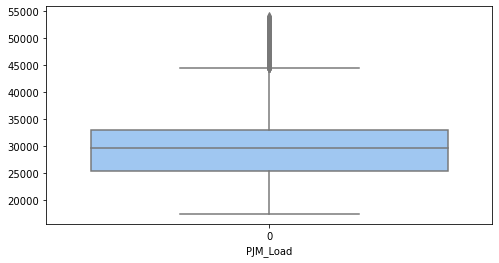

In [12]:
for col in df.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df[col].dropna())
    plt.xlabel(col)
    plt.show

### Analyse des observations (périodicité, doublons, données manquantes)

#### Analyse des données manquantes

In [13]:
df.isna().sum()

AEP          56989
COMED       111765
DAYTON       56987
DEOK        120523
DOM          62073
DUQ          59194
EKPC        132928
FE          115388
NI          119812
PJME         32896
PJMW         35056
PJM_Load    145366
dtype: int64

In [14]:
# Pas de données => remplacement par 0 car compagnies pas encore présentes dans le groupe,
# ou sortie de la compagnie 
df = df.fillna(0)

In [15]:
df.isna().sum()

AEP         0
COMED       0
DAYTON      0
DEOK        0
DOM         0
DUQ         0
EKPC        0
FE          0
NI          0
PJME        0
PJMW        0
PJM_Load    0
dtype: int64

#### Doublons sur les dates

In [16]:
np.where(df.index.duplicated(keep=False) == True)

(array([139480, 139481, 148264, 148265, 156904, 156905, 165712, 165713],
       dtype=int64),)

In [17]:
df.iloc[[139480, 139481, 148264, 148265, 156904, 156905, 165712, 165713],]

AEP   COMED  DAYTON    DEOK     DOM     DUQ    EKPC  \
Datetime                                                                       
2014-11-02 02:00:00  12994.0  8869.0  1623.0  2518.0  8555.0  1272.0  1554.0   
2014-11-02 02:00:00  13190.0  9184.0  1634.0  2562.0  8562.0  1240.0  1566.0   
2015-11-01 02:00:00  10785.0  8270.0  1324.0  2164.0  7392.0  1113.0   978.0   
2015-11-01 02:00:00  10542.0  7923.0  1292.0  2257.0  7345.0  1138.0   944.0   
2016-11-06 02:00:00  10964.0  7814.0  1334.0  2350.0  7924.0  1121.0  1042.0   
2016-11-06 02:00:00  11008.0  8028.0  1364.0  2198.0  8145.0  1107.0  1028.0   
2017-11-05 02:00:00  10596.0  8198.0  1449.0  2064.0  7677.0  1131.0   910.0   
2017-11-05 02:00:00  10446.0  7878.0  1331.0  1044.0  7468.0  1105.0   900.0   

                         FE   NI     PJME    PJMW  PJM_Load  
Datetime                                                     
2014-11-02 02:00:00  6051.0  0.0  22935.0  4613.0       0.0  
2014-11-02 02:00:00  6185.0  0.0  23755.0  4571.0       0.0  
2015-11-01 02:00:00  5653.0  0.0  21567.0  3927.0       0.0  
2015-11-01 02:00:00  5455.0  0.0  21171.0  3832.0       0.0  
2016-11-06 02:00:00  5523.0  0.0  20795.0  4114.0       0.0  
2016-11-06 02:00:00  5587.0  0.0  21692.0  4089.0       0.0  
2017-11-05 02:00:00  5573.0  0.0  21236.0  4042.0       0.0  
2017-11-05 02:00:00  5467.0  0.0  20666.0  3984.0       0.0

In [18]:
# 4 doublons seulement => suppression du premier enregistrement
data_clean = df[~df.index.duplicated(keep='first')].copy()

In [19]:
data_clean.shape

(178258, 12)

In [20]:
np.where(data_clean.index.duplicated(keep=False) == True)

(array([], dtype=int64),)

#### Contrôles des dates manquantes

##### Ajout de colonnes pour décomposer l'index Datetime en colonnes 'Année','Mois','Jour','Heure'

In [21]:
from pandas import DatetimeIndex
## day_of_week:
# 0 - Monday
# 1 - Tuesday
# 2 - Wednesday
# 3 - Thursday
# 4 - Friday
# 5 - Saturday
# 6 - Sunday

data_clean['date'] = data_clean.index.date
data_clean['annee'] = data_clean.index.year
data_clean['mois'] = data_clean.index.month
data_clean['semaine'] = data_clean.index.isocalendar().week
data_clean['heure'] = data_clean.index.hour
data_clean['jour_annee'] = data_clean.index.dayofyear
data_clean['trimestre'] = data_clean.index.quarter
data_clean['jour_semaine'] = data_clean.index.dayofweek
data_clean['jour_mois'] = data_clean.index.day

In [22]:
data_clean.head()

AEP  COMED  DAYTON  DEOK  DOM  DUQ  EKPC   FE   NI  PJME  \
Datetime                                                                        
1998-12-31 01:00:00  0.0    0.0     0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0   
1998-12-31 02:00:00  0.0    0.0     0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0   
1998-12-31 03:00:00  0.0    0.0     0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0   
1998-12-31 04:00:00  0.0    0.0     0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0   
1998-12-31 05:00:00  0.0    0.0     0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0   

                     ...  PJM_Load        date annee  mois  semaine  heure  \
Datetime             ...                                                     
1998-12-31 01:00:00  ...   29309.0  1998-12-31  1998    12       53      1   
1998-12-31 02:00:00  ...   28236.0  1998-12-31  1998    12       53      2   
1998-12-31 03:00:00  ...   27692.0  1998-12-31  1998    12       53      3   
1998-12-31 04:00:00  ...   27596.0  1998-12-31  1998    12       53      4   
1998-12-31 05:00:00  ...   27888.0  1998-12-31  1998    12       53      5   

                     jour_annee  trimestre  jour_semaine  jour_mois  
Datetime                                                             
1998-12-31 01:00:00         365          4             3         31  
1998-12-31 02:00:00         365          4             3         31  
1998-12-31 03:00:00         365          4             3         31  
1998-12-31 04:00:00         365          4             3         31  
1998-12-31 05:00:00         365          4             3         31  

[5 rows x 21 columns]

In [23]:
#### Pour éviter de biaiser nos résultats on supprime les données entre 1998 à 2004
#### Suppression des données avant 2005 
data_clean = data_clean[data_clean['annee'] > 2004]

##### Liste des jours pour lesquels il manque au moins une observation

In [24]:
checkmonth=pd.DataFrame(data_clean.groupby(['jour_annee','annee'])['annee'].count())
checkmonth.rename(columns={'annee':'nb'}, inplace=True)
df_missing=checkmonth[checkmonth.nb!=24]
df_missing=df_missing.reset_index()
df_missing.head(50)

jour_annee  annee  nb
0           67   2009  23
1           67   2015  23
2           68   2014  23
3           69   2008  23
4           69   2013  23
5           70   2007  23
6           70   2018  23
7           71   2012  23
8           71   2017  23
9           72   2011  23
10          73   2010  23
11          73   2016  23
12          92   2006  23
13          93   2005  23
14         215   2018   1
15         302   2006  23
16         303   2005  23
17         305   2009  23
18         307   2008  23
19         307   2013  23
20         308   2007  23
21         309   2012  23
22         310   2011  23
23         311   2010  23
24         344   2010  23

In [25]:
Hour0_24=pd.DataFrame(np.arange(24))
df_to_append=pd.DataFrame()

In [26]:
for x,y in zip(df_missing['jour_annee'],df_missing['annee']):
    print(x,y)
    
    df_encours=data_clean[(data_clean.jour_annee==x)&(data_clean.annee==y)]
    h_missing=Hour0_24[~Hour0_24[0].isin(df_encours.heure)]
    #print(h_missing.iloc[0].name+1)
    
    h=h_missing.iloc[0].name
    df_to_append=df_to_append.append(data_clean[(data_clean.jour_annee==x)&(data_clean.annee==y)&(data_clean.heure==(h+1))])

df_to_append.heure=df_to_append.heure-1
data_clean=data_clean.append(df_to_append)


67 2009
67 2015
68 2014
69 2008
69 2013
70 2007
70 2018
71 2012
71 2017
72 2011
73 2010
73 2016
92 2006
93 2005
215 2018
302 2006
303 2005
305 2009
307 2008
307 2013
308 2007
309 2012
310 2011
311 2010
344 2010


In [27]:
data_clean.sort_index(inplace=True)

# Analyse visuelle des time series

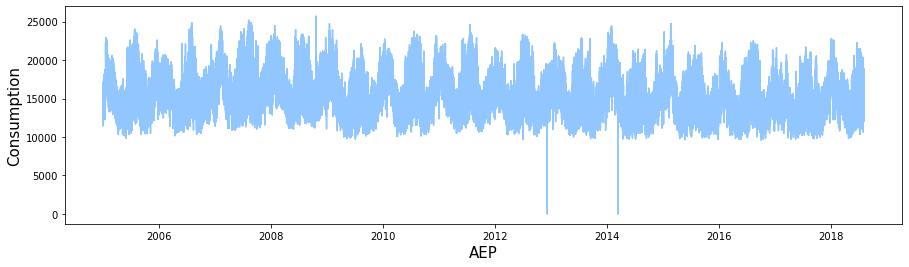

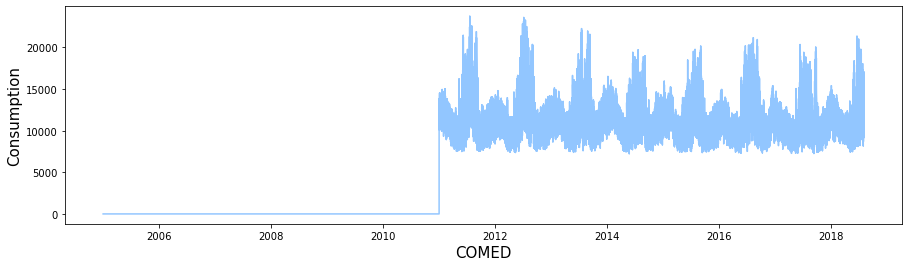

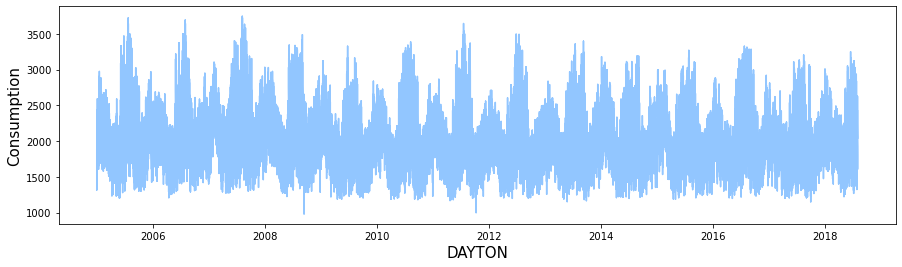

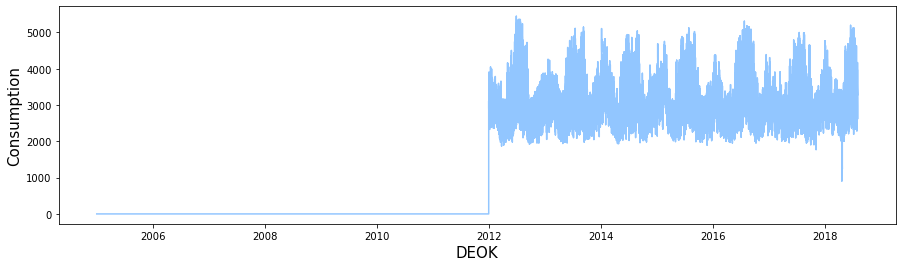

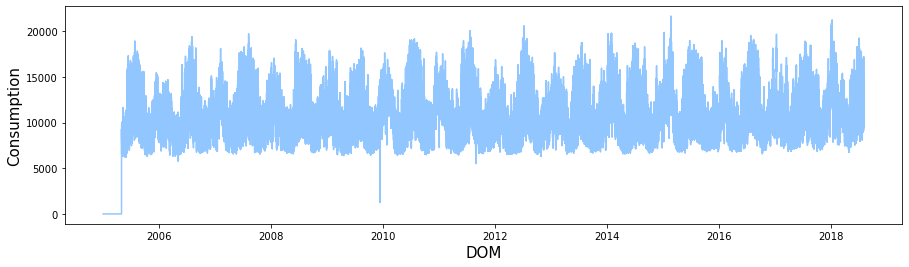

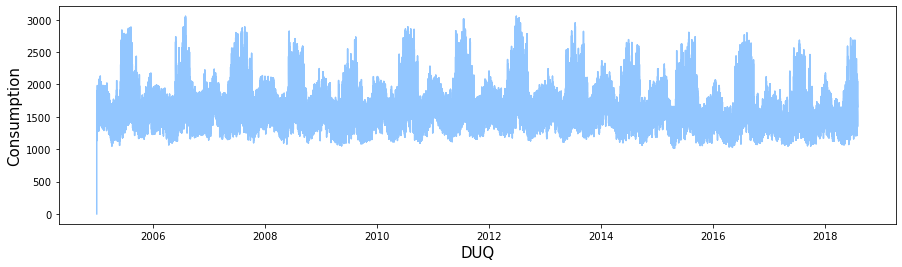

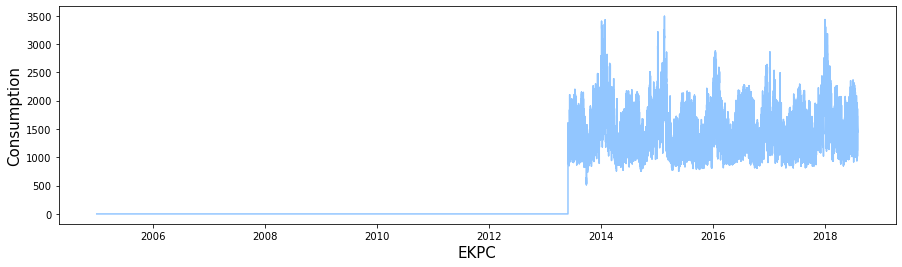

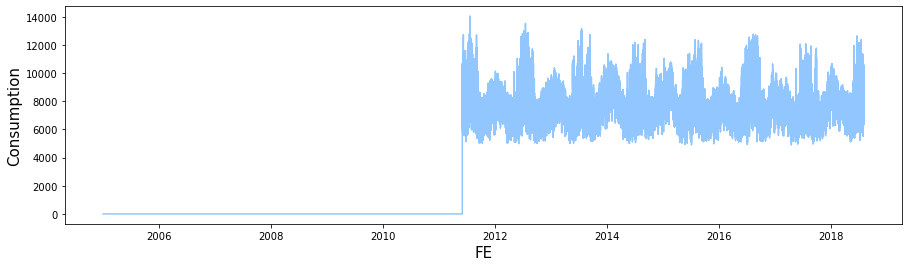

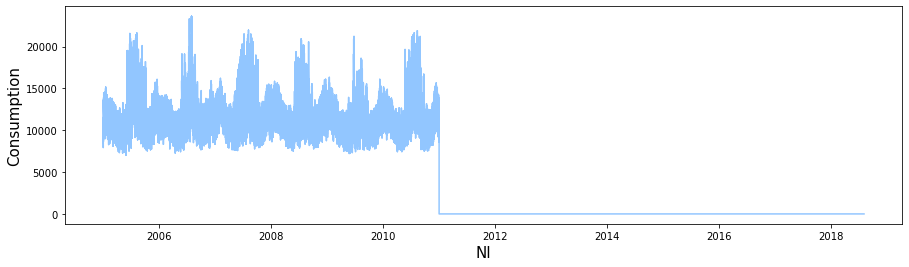

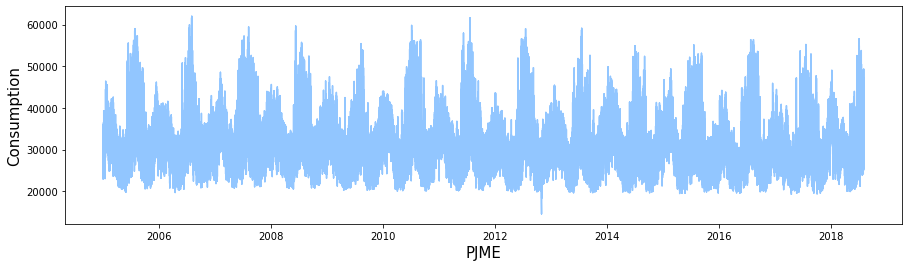

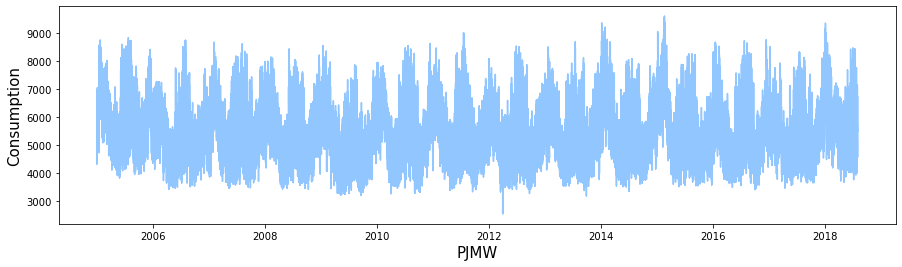

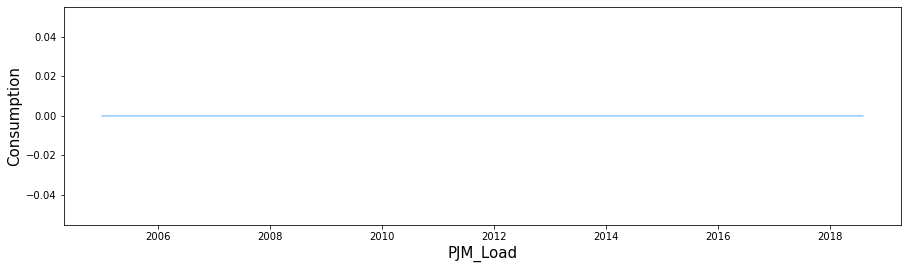

In [28]:
for col in data_clean.loc[:,'AEP':'PJM_Load'].columns:
    plt.figure(figsize = (15,4))
    plt.plot(data_clean['date'], data_clean[col])
    plt.xlabel(col, fontsize=15)
    plt.ylabel('Consumption', fontsize=15)
    plt.show()

# Feature Engineering

### Analyse que sur la consommation globale de PJM (total des compagnies) 
#### Ajout d'une feature sur le total des consommations des compagnies

In [29]:
data_clean['Total'] = data_clean.apply(lambda x : x.loc['AEP':'PJM_Load'].sum(), axis=1)

In [30]:
data_clean.head(50)

AEP  COMED  DAYTON  DEOK  DOM     DUQ  EKPC   FE  \
Datetime                                                                    
2005-01-01 00:00:00  12892.0    0.0  1560.0   0.0  0.0     0.0   0.0  0.0   
2005-01-01 01:00:00  12316.0    0.0  1490.0   0.0  0.0  1364.0   0.0  0.0   
2005-01-01 02:00:00  11890.0    0.0  1429.0   0.0  0.0  1273.0   0.0  0.0   
2005-01-01 03:00:00  11579.0    0.0  1367.0   0.0  0.0  1218.0   0.0  0.0   
2005-01-01 04:00:00  11461.0    0.0  1325.0   0.0  0.0  1170.0   0.0  0.0   
2005-01-01 05:00:00  11472.0    0.0  1316.0   0.0  0.0  1166.0   0.0  0.0   
2005-01-01 06:00:00  11571.0    0.0  1335.0   0.0  0.0  1181.0   0.0  0.0   
2005-01-01 07:00:00  11898.0    0.0  1367.0   0.0  0.0  1215.0   0.0  0.0   
2005-01-01 08:00:00  12209.0    0.0  1426.0   0.0  0.0  1258.0   0.0  0.0   
2005-01-01 09:00:00  12396.0    0.0  1469.0   0.0  0.0  1270.0   0.0  0.0   
2005-01-01 10:00:00  12997.0    0.0  1573.0   0.0  0.0  1274.0   0.0  0.0   
2005-01-01 11:00:00  13455.0    0.0  1667.0   0.0  0.0  1330.0   0.0  0.0   
2005-01-01 12:00:00  13617.0    0.0  1734.0   0.0  0.0  1352.0   0.0  0.0   
2005-01-01 13:00:00  13665.0    0.0  1744.0   0.0  0.0  1371.0   0.0  0.0   
2005-01-01 14:00:00  13446.0    0.0  1743.0   0.0  0.0  1356.0   0.0  0.0   
2005-01-01 15:00:00  13340.0    0.0  1723.0   0.0  0.0  1371.0   0.0  0.0   
2005-01-01 16:00:00  13159.0    0.0  1727.0   0.0  0.0  1355.0   0.0  0.0   
2005-01-01 17:00:00  13449.0    0.0  1755.0   0.0  0.0  1388.0   0.0  0.0   
2005-01-01 18:00:00  14319.0    0.0  1867.0   0.0  0.0  1522.0   0.0  0.0   
2005-01-01 19:00:00  14536.0    0.0  1882.0   0.0  0.0  1559.0   0.0  0.0   
2005-01-01 20:00:00  14454.0    0.0  1854.0   0.0  0.0  1546.0   0.0  0.0   
2005-01-01 21:00:00  14248.0    0.0  1812.0   0.0  0.0  1541.0   0.0  0.0   
2005-01-01 22:00:00  13970.0    0.0  1755.0   0.0  0.0  1534.0   0.0  0.0   
2005-01-01 23:00:00  13558.0    0.0  1676.0   0.0  0.0  1497.0   0.0  0.0   
2005-01-02 00:00:00  12849.0    0.0  1576.0   0.0  0.0  1389.0   0.0  0.0   
2005-01-02 01:00:00  12291.0    0.0  1461.0   0.0  0.0  1251.0   0.0  0.0   
2005-01-02 02:00:00  11917.0    0.0  1399.0   0.0  0.0  1204.0   0.0  0.0   
2005-01-02 03:00:00  11681.0    0.0  1357.0   0.0  0.0  1159.0   0.0  0.0   
2005-01-02 04:00:00  11613.0    0.0  1350.0   0.0  0.0  1141.0   0.0  0.0   
2005-01-02 05:00:00  11685.0    0.0  1341.0   0.0  0.0  1134.0   0.0  0.0   
2005-01-02 06:00:00  11936.0    0.0  1374.0   0.0  0.0  1161.0   0.0  0.0   
2005-01-02 07:00:00  12342.0    0.0  1432.0   0.0  0.0  1199.0   0.0  0.0   
2005-01-02 08:00:00  12986.0    0.0  1512.0   0.0  0.0  1270.0   0.0  0.0   
2005-01-02 09:00:00  13485.0    0.0  1577.0   0.0  0.0  1290.0   0.0  0.0   
2005-01-02 10:00:00  13909.0    0.0  1652.0   0.0  0.0  1320.0   0.0  0.0   
2005-01-02 11:00:00  13840.0    0.0  1691.0   0.0  0.0  1353.0   0.0  0.0   
2005-01-02 12:00:00  13914.0    0.0  1731.0   0.0  0.0  1391.0   0.0  0.0   
2005-01-02 13:00:00  13991.0    0.0  1764.0   0.0  0.0  1422.0   0.0  0.0   
2005-01-02 14:00:00  13885.0    0.0  1750.0   0.0  0.0  1410.0   0.0  0.0   
2005-01-02 15:00:00  13818.0    0.0  1739.0   0.0  0.0  1417.0   0.0  0.0   
2005-01-02 16:00:00  13695.0    0.0  1741.0   0.0  0.0  1398.0   0.0  0.0   
2005-01-02 17:00:00  14026.0    0.0  1760.0   0.0  0.0  1451.0   0.0  0.0   
2005-01-02 18:00:00  15073.0    0.0  1920.0   0.0  0.0  1588.0   0.0  0.0   
2005-01-02 19:00:00  15269.0    0.0  1975.0   0.0  0.0  1624.0   0.0  0.0   
2005-01-02 20:00:00  15265.0    0.0  1956.0   0.0  0.0  1640.0   0.0  0.0   
2005-01-02 21:00:00  14916.0    0.0  1909.0   0.0  0.0  1644.0   0.0  0.0   
2005-01-02 22:00:00  14521.0    0.0  1833.0   0.0  0.0  1599.0   0.0  0.0   
2005-01-02 23:00:00  13805.0    0.0  1728.0   0.0  0.0  1503.0   0.0  0.0   
2005-01-03 00:00:00  13080.0    0.0  1625.0   0.0  0.0  1410.0   0.0  0.0   
2005-01-03 01:00:00  12566.0    0.0  1531.0   0.0  0.0  1299.0   0.0  0.0   

                    

In [31]:
data_clean.tail(50)

AEP    COMED  DAYTON    DEOK      DOM     DUQ  \
Datetime                                                                 
2018-07-31 23:00:00  15504.0  12898.0  2096.0  3503.0  12787.0  1740.0   
2018-08-01 00:00:00  14424.0  11945.0  1928.0  3187.0  11712.0  1603.0   
2018-08-01 01:00:00  13538.0  10975.0  1796.0  2971.0  10947.0  1510.0   
2018-08-01 02:00:00  12903.0  10233.0  1715.0  2807.0  10398.0  1432.0   
2018-08-01 03:00:00  12506.0   9734.0  1648.0  2695.0  10115.0  1391.0   
2018-08-01 04:00:00  12206.0   9374.0  1613.0  2615.0   9944.0  1358.0   
2018-08-01 05:00:00  12295.0   9156.0  1626.0  2624.0  10033.0  1384.0   
2018-08-01 06:00:00  12714.0   9270.0  1697.0  2737.0  10530.0  1459.0   
2018-08-01 07:00:00  13512.0   9753.0  1851.0  2963.0  11177.0  1555.0   
2018-08-01 08:00:00  14139.0  10466.0  1950.0  3097.0  11840.0  1605.0   
2018-08-01 09:00:00  14685.0  11424.0  2032.0  3210.0  12453.0  1676.0   
2018-08-01 10:00:00  15223.0  12294.0  2068.0  3301.0  13080.0  1725.0   
2018-08-01 11:00:00  15648.0  13025.0  2122.0  3384.0  13973.0  1808.0   
2018-08-01 12:00:00  16116.0  13814.0  2140.0  3465.0  14639.0  1888.0   
2018-08-01 13:00:00  16623.0  14516.0  2183.0  3545.0  15360.0  1947.0   
2018-08-01 14:00:00  17008.0  15203.0  2247.0  3670.0  15987.0  1990.0   
2018-08-01 15:00:00  17146.0  15881.0  2311.0  3748.0  16345.0  2052.0   
2018-08-01 16:00:00  17193.0  16123.0  2314.0  3859.0  16713.0  2082.0   
2018-08-01 17:00:00  17183.0  15766.0  2377.0  3931.0  17208.0  2073.0   
2018-08-01 18:00:00  17204.0  15574.0  2433.0  3972.0  17131.0  2017.0   
2018-08-01 19:00:00  16870.0  15569.0  2402.0  3873.0  16638.0  1953.0   
2018-08-01 20:00:00  16579.0  15122.0  2349.0  3793.0  15973.0  1907.0   
2018-08-01 21:00:00  16457.0  14449.0  2270.0  3688.0  15461.0  1865.0   
2018-08-01 22:00:00  16197.0  14246.0  2257.0  3687.0  14687.0  1809.0   
2018-08-01 23:00:00  15259.0  13778.0  2118.0  3467.0  13569.0  1704.0   
2018-08-02 00:00:00  14125.0  12892.0  1924.0  3209.0  12362.0  1580.0   
2018-08-02 01:00:00  13286.0  11916.0  1789.0  2963.0  11457.0  1480.0   
2018-08-02 02:00:00  12587.0  11095.0  1717.0  2791.0  10830.0  1400.0   
2018-08-02 03:00:00  12296.0  10530.0  1632.0  2682.0  10353.0  1351.0   
2018-08-02 04:00:00  12059.0  10165.0  1605.0  2613.0  10082.0  1346.0   
2018-08-02 05:00:00  12224.0   9931.0  1604.0  2613.0  10058.0  1353.0   
2018-08-02 06:00:00  12781.0   9996.0  1684.0  2728.0  10490.0  1413.0   
2018-08-02 07:00:00  13661.0  10482.0  1820.0  2956.0  11181.0  1503.0   
2018-08-02 08:00:00  14326.0  11200.0  1927.0  3083.0  11850.0  1592.0   
2018-08-02 09:00:00  14834.0  12179.0  2023.0  3239.0  12555.0  1674.0   
2018-08-02 10:00:00  15309.0  13042.0  2107.0  3359.0  13232.0  1735.0   
2018-08-02 11:00:00  16025.0  13828.0  2226.0  3536.0  13966.0  1792.0   
2018-08-02 12:00:00  16651.0  14790.0  2315.0  3674.0  14666.0  1865.0   
2018-08-02 13:00:00  17423.0  15527.0  2429.0  3890.0  15191.0  1931.0   
2018-08-02 14:00:00  18067.0  16074.0  2525.0  3991.0  15244.0  1952.0   
2018-08-02 15:00:00  18534.0  16584.0  2576.0  4070.0  14941.0  1983.0   
2018-08-02 16:00:00  18826.0  16869.0  2594.0  4113.0  14791.0  2029.0   
2018-08-02 17:00:00  18869.0  17015.0  2626.0  4136.0  14924.0  2039.0   
2018-08-02 18:00:00  18562.0  17068.0  2624.0  4168.0  14898.0  2050.0   
2018-08-02 19:00:00  18118.0  16897.0  2600.0  4122.0  14453.0  1999.0   
2018-08-02 20:00:00  17673.0  16437.0  2554.0  4052.0  14038.0  1966.0   
2018-08-02 21:00:00  17303.0  15590.0  2481.0  3892.0  13832.0  1944.0   
2018-08-02 22:00:00  17001.0  15086.0  2405.0  3851.0  13312.0  1901.0   
2018-08-02 23:00:00  15964.0  14448.0  2250.0  3575.0  12390.0  1789.0   
2018-08-03 00:00:00  14809.0  13335.0  2042.0  3281.0  11385.0  1656.0   

                       EKPC       FE   NI     PJME  ...        date  annee  \
Datetime                                            ...                      
2018-07-31 23:00:00 

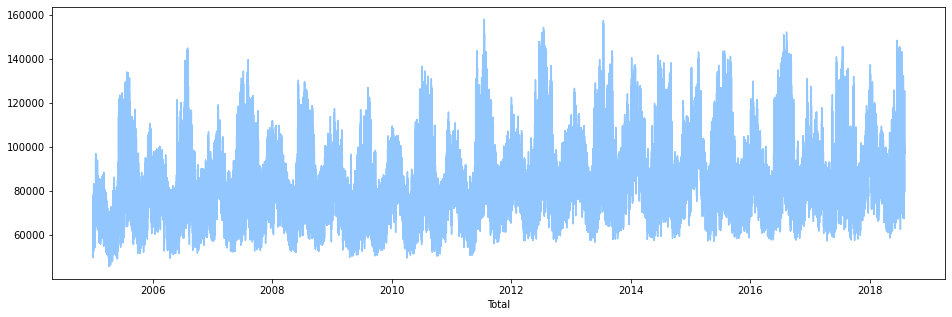

In [32]:
plt.figure(figsize=(16,5))
plt.plot(data_clean['date'], data_clean['Total'])
plt.xlabel("Total")
plt.show()

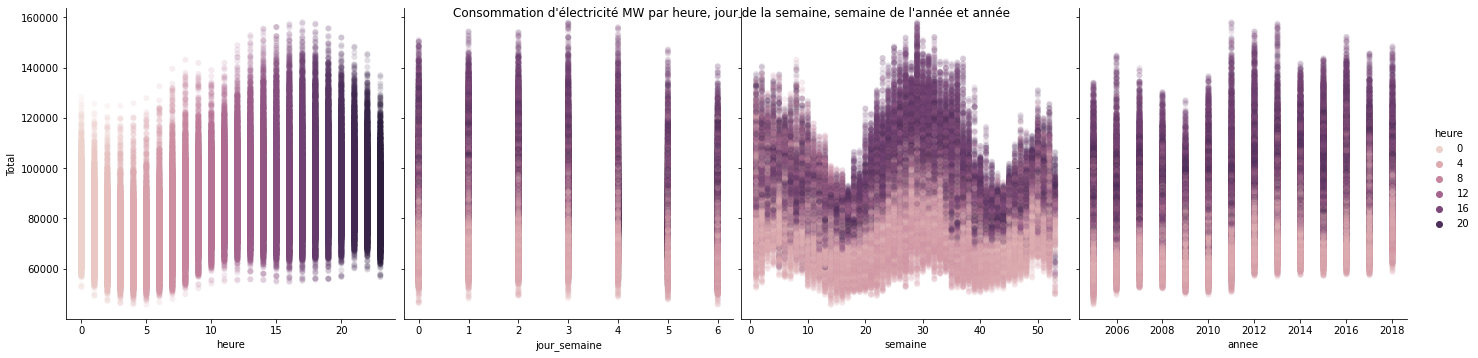

In [33]:
sns.pairplot(data_clean.dropna(),
             hue='heure',
             x_vars=['heure','jour_semaine'
                     ,'semaine','annee'],
             y_vars='Total',
             height=5,
             plot_kws={'alpha':0.15, 'linewidth':0}
            )
plt.suptitle('Consommation d\'électricité MW par heure, jour de la semaine, semaine de l\'année et année')
plt.show()

### Définition de nouvelles features

#### La prédiction de consommation d'énergie électrique à long terme doit se baser sur le total de la consommation électrique par jour

In [34]:
#Création de la feature de consommation total d'energie par jour
df_feature_total_per_day = pd.DataFrame(data_clean.groupby(['date'])['Total'].sum())

# Retrait de la dernière ligne qui a une consommation incomplète
df_feature_total_per_day = df_feature_total_per_day[:-1]

print(df_feature_total_per_day.head())
print(df_feature_total_per_day.tail())

# Converting the index as date
df_feature_total_per_day.index = pd.to_datetime(df_feature_total_per_day.index, format="%Y-%m-%d")

                Total
date                 
2005-01-01  1369994.0
2005-01-02  1439464.0
2005-01-03  1602888.0
2005-01-04  1623191.0
2005-01-05  1711922.0
                Total
date                 
2018-07-29  2120395.0
2018-07-30  2270128.0
2018-07-31  2324560.0
2018-08-01  2484528.0
2018-08-02  2525317.0


### Persistence
La première étape avant de passer à l'analyse et la modélisation des données est d'établir une référence de performance. Cela fournira à la fois un modèle pour évaluer les modèles en utilisant les "harnais'" de test et une mesure de la performance par laquelle tous les modèles prédictifs plus élaborés peuvent être comparés. 

La prédiction de base pour la prévision de séries chronologiques est appelée prévision naïve, ou persistance. C'est là que l'observation du pas de temps précédent est utilisée comme prédiction pour l'observation au prochain pas de temps. (valeur prédite = valeur du timestep précédent)

In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Feature = Total de la consommation électrique par jour
X = df_feature_total_per_day[['Total']].values

# Echantillons d'apprentissage et de validation 
train_rate = 0.50
train_size = int(len(X) * train_rate)
train, test = X[0:train_size], X[train_size:]

print("Train shape : ",train.shape)
print("Test shape : ", test.shape)

# walk-forward validation => valeur prédite = valeur de la veille
history = [x for x in train]
predictions = list()
print(len(test))
for i in range(len(test)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))

# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

Train shape :  (2481, 1)
Test shape :  (2481, 1)
2481
>Predicted=1834659.000, Expected=1874462.000
>Predicted=1874462.000, Expected=1918336.000
>Predicted=1918336.000, Expected=1924230.000
>Predicted=1924230.000, Expected=1883493.000
>Predicted=1883493.000, Expected=1720408.000
>Predicted=1720408.000, Expected=1675728.000
>Predicted=1675728.000, Expected=1868327.000
>Predicted=1868327.000, Expected=1881929.000
>Predicted=1881929.000, Expected=1881498.000
>Predicted=1881498.000, Expected=1901229.000
>Predicted=1901229.000, Expected=1946593.000
>Predicted=1946593.000, Expected=1876462.000
>Predicted=1876462.000, Expected=1808732.000
>Predicted=1808732.000, Expected=1996025.000
>Predicted=1996025.000, Expected=1968947.000
>Predicted=1968947.000, Expected=1964948.000
>Predicted=1964948.000, Expected=1947074.000
>Predicted=1947074.000, Expected=1907024.000
>Predicted=1907024.000, Expected=1828615.000
>Predicted=1828615.000, Expected=1781151.000
>Predicted=1781151.000, Expected=1940522.000
>

>Predicted=1964147.000, Expected=1988041.000
>Predicted=1988041.000, Expected=1956550.000
>Predicted=1956550.000, Expected=1864881.000
>Predicted=1864881.000, Expected=1779634.000
>Predicted=1779634.000, Expected=2044466.000
>Predicted=2044466.000, Expected=2190457.000
>Predicted=2190457.000, Expected=2053301.000
>Predicted=2053301.000, Expected=2029260.000
>Predicted=2029260.000, Expected=1953597.000
>Predicted=1953597.000, Expected=1808359.000
>Predicted=1808359.000, Expected=1893656.000
>Predicted=1893656.000, Expected=2092427.000
>Predicted=2092427.000, Expected=2071092.000
>Predicted=2071092.000, Expected=2111265.000
>Predicted=2111265.000, Expected=2146594.000
>Predicted=2146594.000, Expected=2244207.000
>Predicted=2244207.000, Expected=2223428.000
>Predicted=2223428.000, Expected=2142324.000
>Predicted=2142324.000, Expected=2103383.000
>Predicted=2103383.000, Expected=2414194.000
>Predicted=2414194.000, Expected=2406611.000
>Predicted=2406611.000, Expected=2402404.000
>Predicted

In [36]:
print('% erreur / consommation électrique quotidienne : {:.2%} du minimum - {:.2%} du maximum'.format(rmse/X.min(),rmse/X.max()))

% erreur / consommation électrique quotidienne : 11.78% du minimum - 4.77% du maximum


#### Le RMSE du test de persistence est de 150234.588 
##### En moyenne la valeur prédite a une erreur de 150234 MW



# Exploration de la time series de consommation électrique totale par jour

## Statistiques descriptives

In [37]:
df_feature_total_per_day.describe()

Total
count  4.962000e+03
mean   2.048073e+06
std    3.011892e+05
min    1.275837e+06
25%    1.833779e+06
50%    2.006090e+06
75%    2.242308e+06
max    3.148567e+06

##### 4962 observations
##### Moyenne : 2 048 073 (Level)
##### Ecart-type et quantile suggèrent une répartition étroite autour de la moyenne

## Visualisation de la Time Series

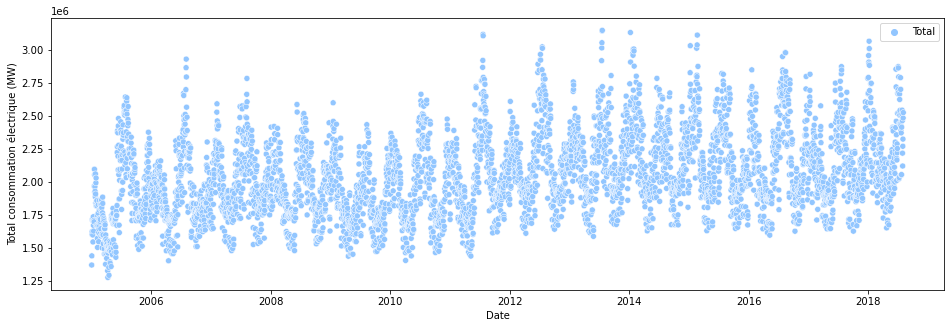

In [38]:
plt.figure(figsize=(16,5))
sns.scatterplot(data=df_feature_total_per_day)
plt.xlabel("Date")
plt.ylabel("Total consommation électrique (MW)")
plt.show()

## Distribution et densité

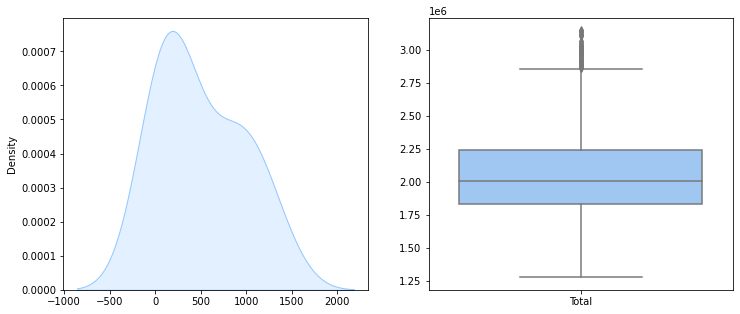

In [39]:
plt.figure(1,figsize=(12,5))
plt.subplot(121)
hist, bin_edges = np.histogram(df_feature_total_per_day)
sns.kdeplot(hist, label='X', fill=True)
plt.subplot(122)
sns.boxplot(data=df_feature_total_per_day)
plt.show()

## Boxplot

<AxesSubplot:>

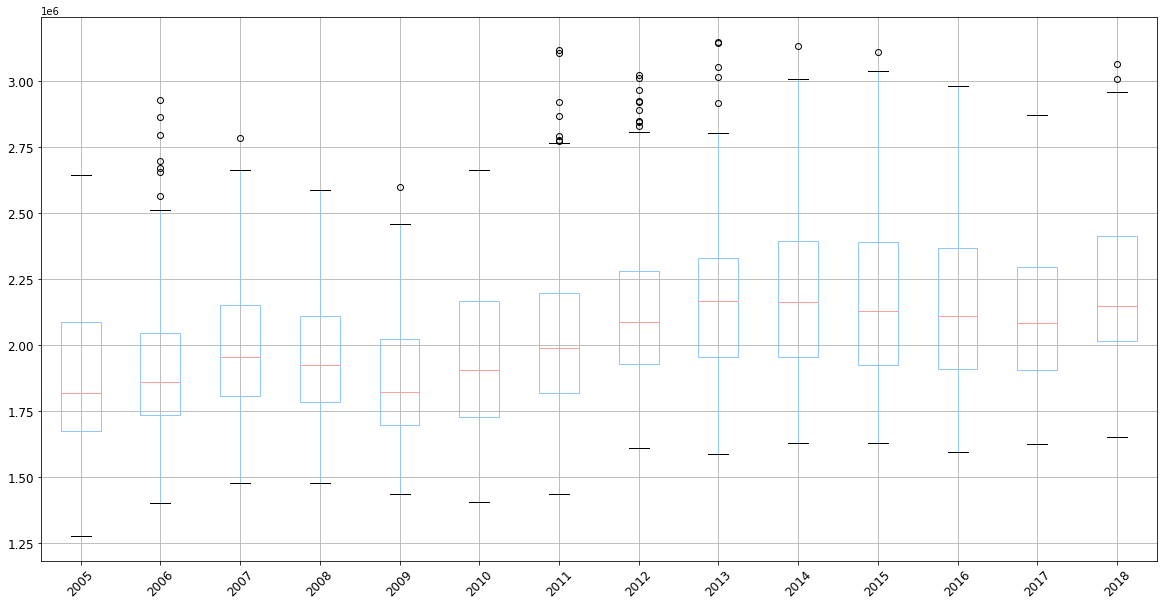

In [40]:
df = df_feature_total_per_day.copy()
df['annee'] = df.index.year
df.pivot(columns='annee', values='Total').boxplot(rot=45, fontsize=12, figsize=(20,10))

- La valeur médiane de chaque année indique une légère tendance à la hausse
- La répartition des valeurs de chaque année indique une légère variation

La time series semble stationnaire.

# Analyse de la structure temporelle 

## Décomposition de la time series

La décomposition des séries chronologiques implique de penser à une série comme une combinaison :
- de niveau,
- de tendance,
- de saisonnalité,
- les composants du bruit.

La décomposition fournit un modèle abstrait utile pour réfléchir au temps séries en général et pour une meilleure compréhension des problèmes lors de l’analyse et de la prévision des séries chronologiques.

### Analyse de la saisonnalité dans la série

Une structure de cycle dans une série chronologique peut ou non être saisonnière. S'il se répète constamment à
la même fréquence, elle est saisonnière, sinon elle n'est pas saisonnière et s'appelle un cycle.

<b>Avantages de la saisonnalité pour le machine learning</b>

Comprendre la composante saisonnière dans les séries chronologiques peut améliorer les performances de la modélisation avec l'apprentissage automatique. 


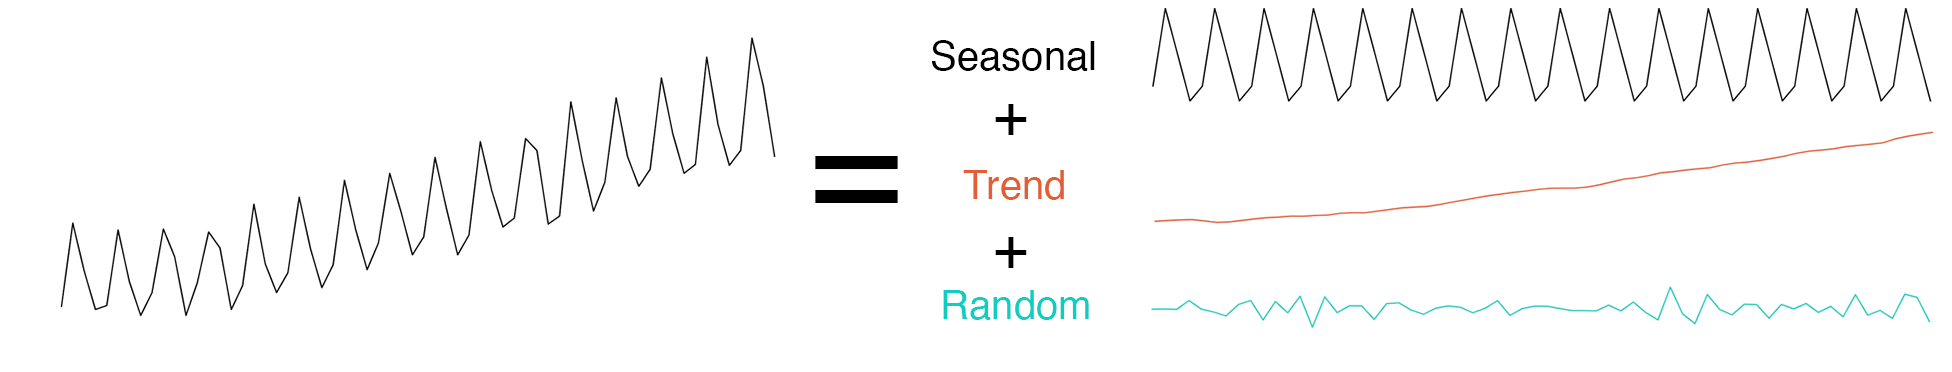
https://anomaly.io/seasonal-trend-decomposition-in-r/index.html

Cela peut se produire de deux manières principales :

- <b>Un signal plus clair</b>  : l'identification et la suppression de la composante saisonnière de la série chronologique peuvent résulter en une relation plus claire entre les variables d'entrée et de sortie.
- <b>Plus d'informations</b>   : les informations supplémentaires sur la composante saisonnière de la time series peuvent fournir de nouvelles informations pour améliorer les performances du modèle.

Les deux approches peuvent être utiles sur un projet. 

La modélisation et la suppression de la saisonnalité peut être réalisée pendant la phase de nettoyage et préparation des données. 
L'extraction des informations saisonnières et leur sélection en tant que données d'entrée, soit directement ou sous forme de résumé, peut être réalisée pendant les phases de features selection et features engineering.

<u>Types de saisonnalité </u>:
- Heure de la journée
- Quotidienne
- Hebdomadaire
- Mensuelle
- Annuelle

L'approche la plus simple pour déterminer la saisonnalité est d'afficher graphiquement la time series, peut-être à différentes échelles, et l'ajout d'une courbe de tendance.



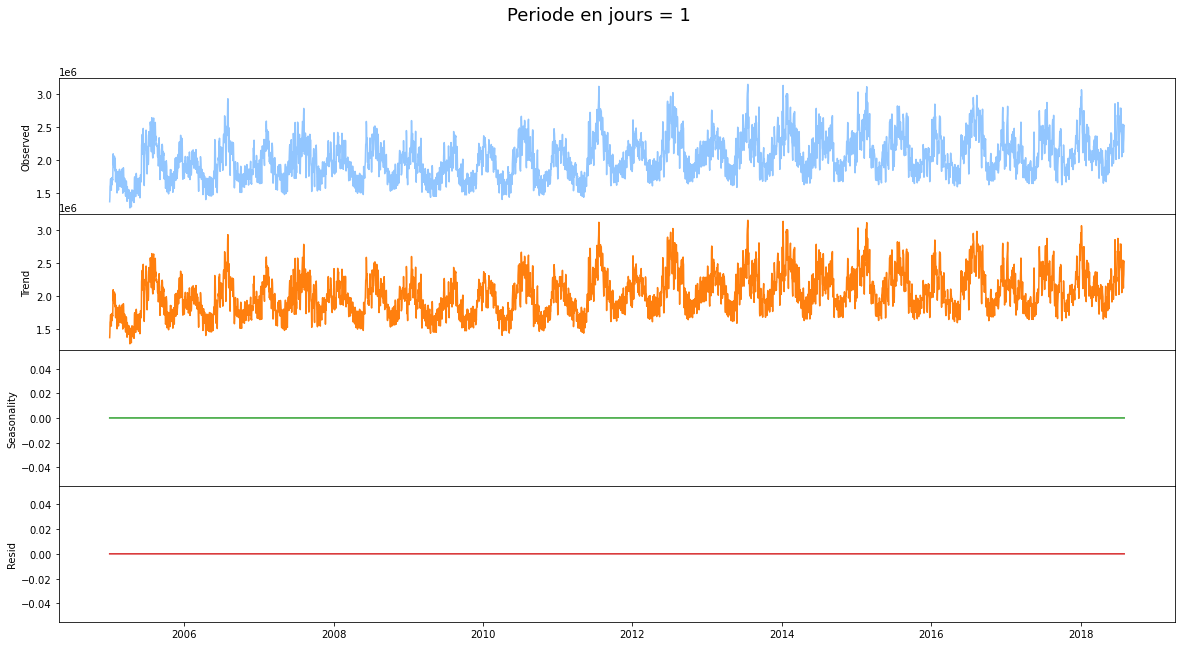

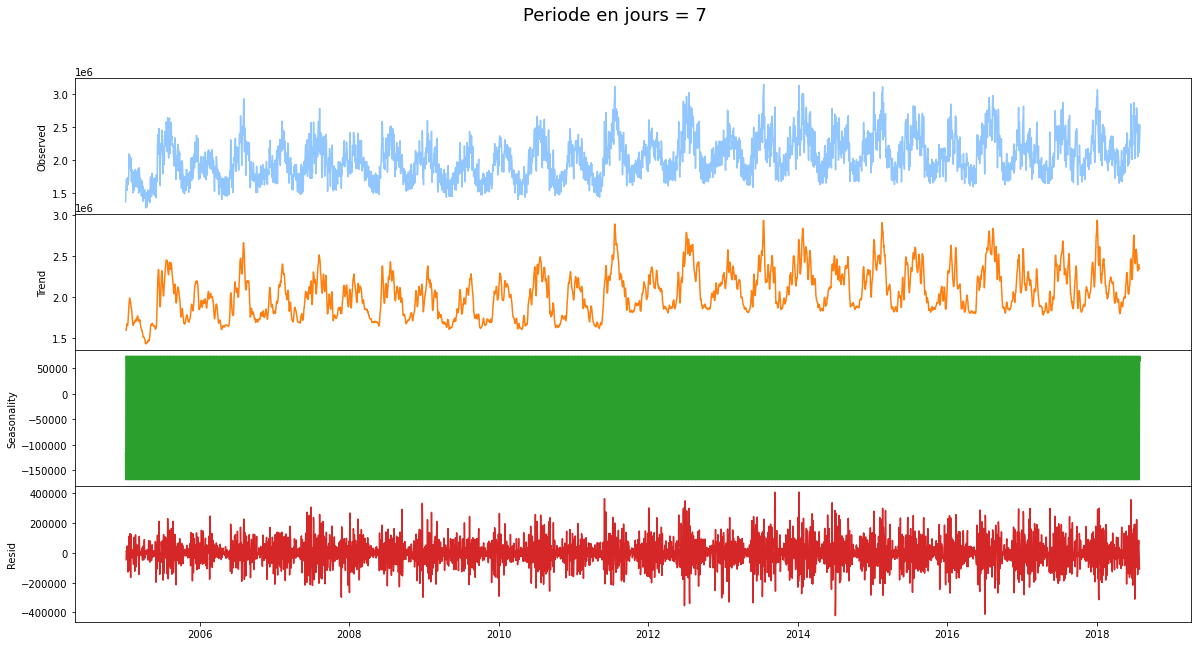

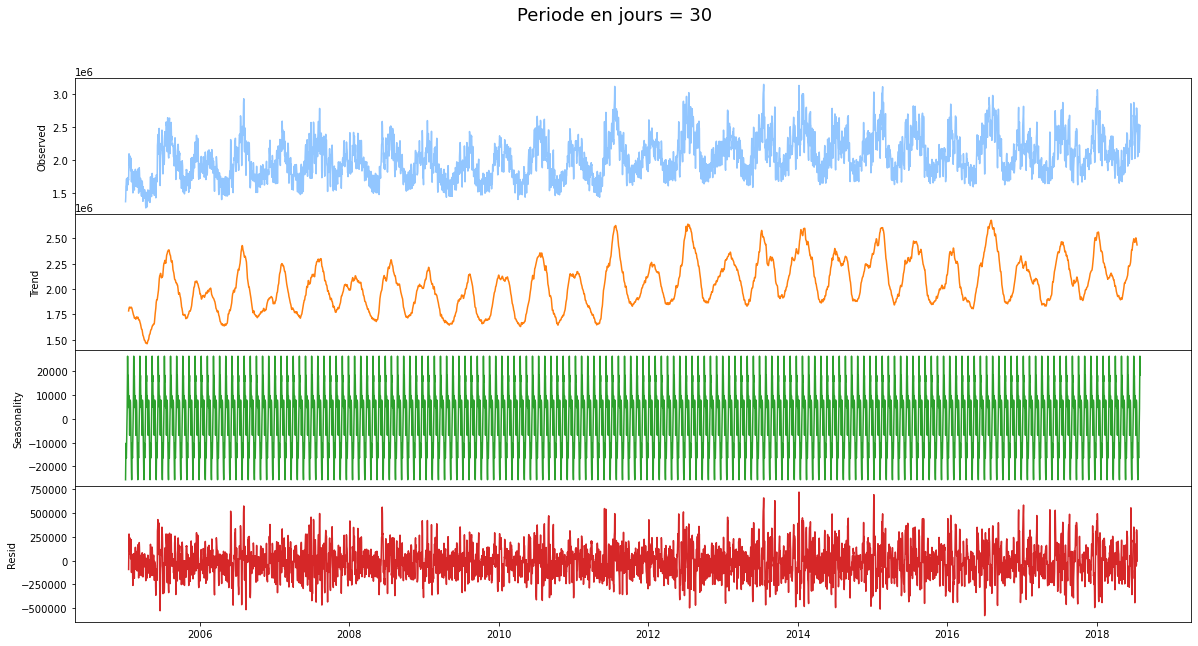

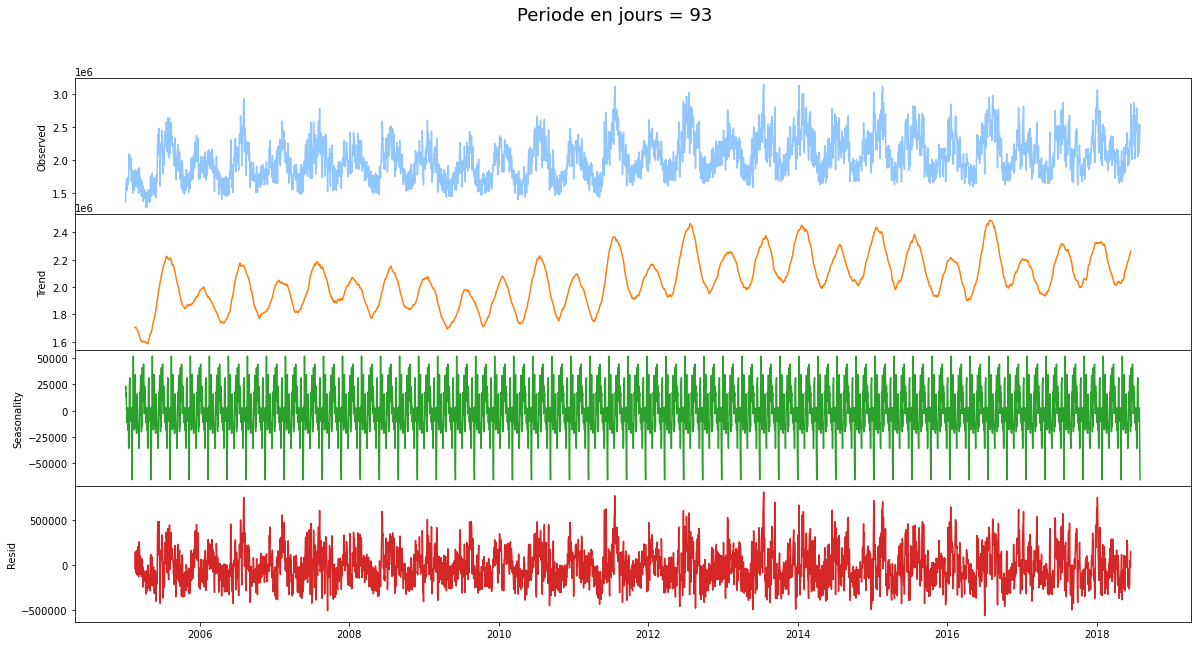

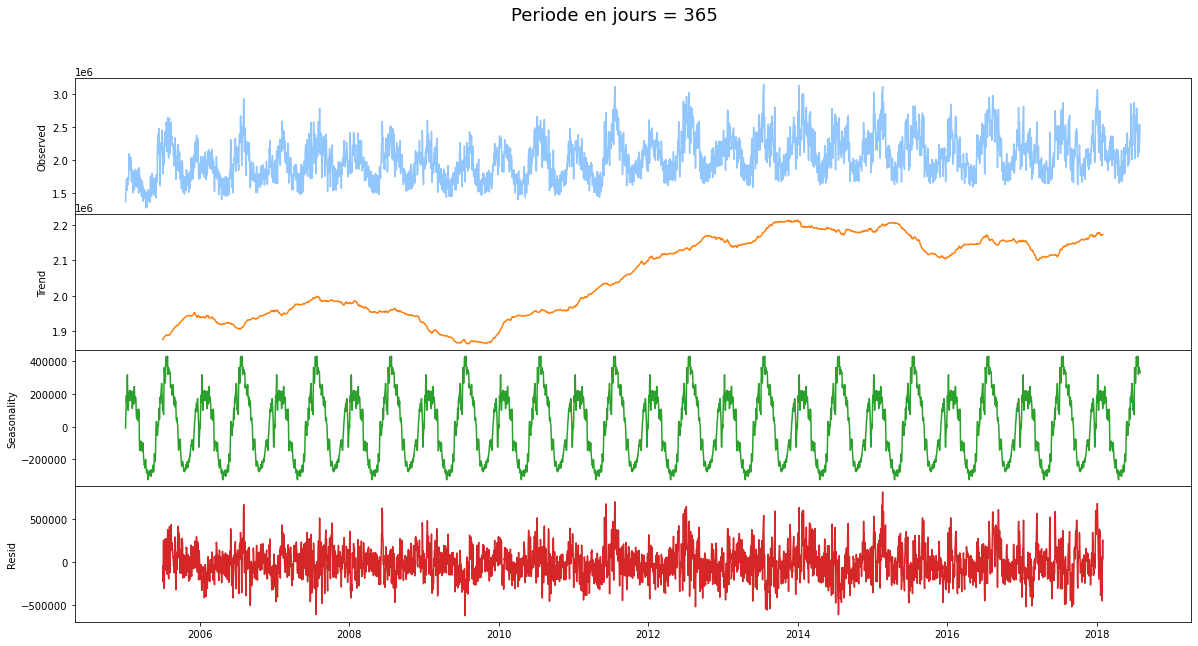

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose


for i in [1,7,30,93,365]:
    result = seasonal_decompose(df_feature_total_per_day, model='additive',period=i)
    #print(result.trend)
    #print(result.seasonal)
    #print(result.resid)
    #print(result.observed)
    #result.plot()
    
    fig, axs = plt.subplots(4,figsize = (20,10), sharex=True, gridspec_kw={'hspace': 0})
    
    fig.suptitle("Periode en jours = {}".format(i), fontsize=18)

    axs[0].plot(result.observed)
    axs[0].set_ylabel("Observed")
    axs[1].plot(result.trend, 'tab:orange')
    axs[1].set_ylabel("Trend")
    axs[2].plot(result.seasonal, 'tab:green')
    axs[2].set_ylabel("Seasonality")
    axs[3].plot(result.resid, 'tab:red')
    axs[3].set_ylabel("Resid")

    #plt.plot(result.observed)
    #plt.ylabel("Observed",fontsize=18)
    #plt.show()
    #plt.figure(figsize=(20,4))
    #plt.plot(result.trend)
    #plt.ylabel("Trend",fontsize=18)
    #plt.show()
    #plt.figure(figsize=(20,4))
    #plt.plot(result.seasonal)
    #plt.ylabel("Seasonality",fontsize=18)
    #plt.show()
    #plt.figure(figsize=(20,4))
    #plt.plot(result.resid)
    #plt.ylabel("Resid",fontsize=18)

    plt.show()
    print("\n\n")


###### Suppression de la saisonnalité

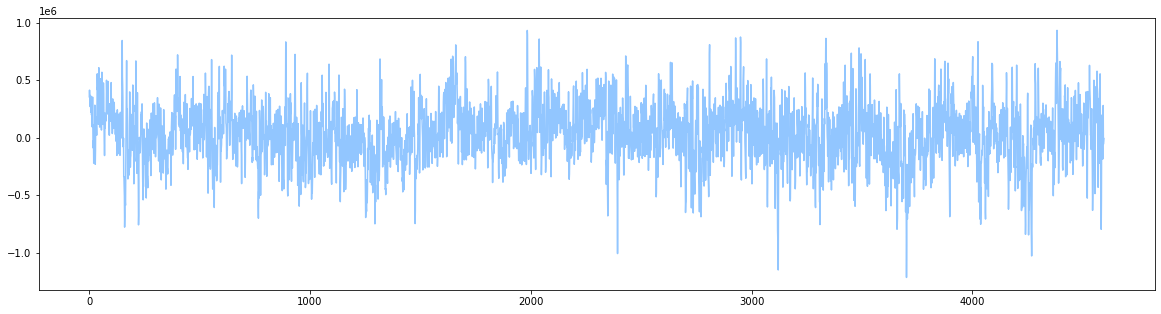

In [42]:
X = df_feature_total_per_day.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
    value = X[i] - X[i - days_in_year]
    diff.append(value)

plt.figure(figsize=(20,5))
plt.plot(diff)
plt.show()

In [43]:
df_feature_total_per_day_decompose = df_feature_total_per_day[days_in_year:].copy()
df_feature_total_per_day_decompose['Total_without_seasonality'] = diff

## Contrôle de la stationnarité

Les observations dans une série chronologique stationnaire ne dépendent pas du temps. Les séries chronologiques sont stationnaires si elles n'ont pas d'effets de tendance ou de saison. 
Les statistiques récapitulatives calculées sur la série chronologique sont cohérentes dans le temps, comme la moyenne ou la variance des observations. Quand une série chronologique est stationnaire, elle peut être plus facile à modéliser. Les méthodes de modélisation statistique supposent ou exigent que les séries chronologiques doivent être stationnaires pour être efficaces.

<b><u>Notions et types de séries temporelles stationnaires</u></b>

- <b>Processus stationnaire :</b> processus qui génère une série d'observations stationnaires.
- <b>Modèle stationnaire :</b> Un modèle qui décrit une série stationnaire d'observations.
- <b>Tendance stationnaire :</b> une série chronologique qui ne présente pas de tendance.
- <b>Stationnaire saisonnier :</b> une série chronologique qui ne présente pas de saisonnalité.
- <b>Strictement stationnaire :</b> la distribution conjointe des observations est invariante au décalage temporel.

### Test statistique de stationnarité : augmented Dickey-Fuller test

In [44]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_feature_total_per_day['Total'].values)
print('ADF Statistic: %f' % result[0])
print('p-value: {:f} ({})'.format(result[1],result[1]))
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.628947
p-value: 0.000000 (5.780186754846909e-09)
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [45]:
# Données avec suppression dela saisonnalité
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_feature_total_per_day_decompose['Total_without_seasonality'].values)
print('ADF Statistic: %f' % result[0])
print('p-value: {:f} ({})'.format(result[1],result[1]))
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.953505
p-value: 0.000000 (3.080818033857026e-12)
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


La P-value à 0 (< 0.05 soit 5%) et le résultat statistique du test à -6.62 ( < à la valeur critique de 1% soit -3.432) indiquent que la time series est stationnaire.

Le résultat du test confirme la conclusion suggérée par la visualisation des boxplot par année.

Ces résultats suggèrent que le modèle ARIMA ait au moins 1 niveau de différenciation (paramètre <b>d</b>  du modèle >= 1).

## Autocorrélation et autorégression

L'étape suivante consiste à sélectionner les valeurs de décalage pour l'Autorégression (AR) et la moyenne mobile (MA), respectivement les paramètres p et q du modèle ARIMA. Il faut pour cela utiliser la fonction d'autocorrélation (ACF) et les tracés de fonction d'autocorrélation partielle (PACF).

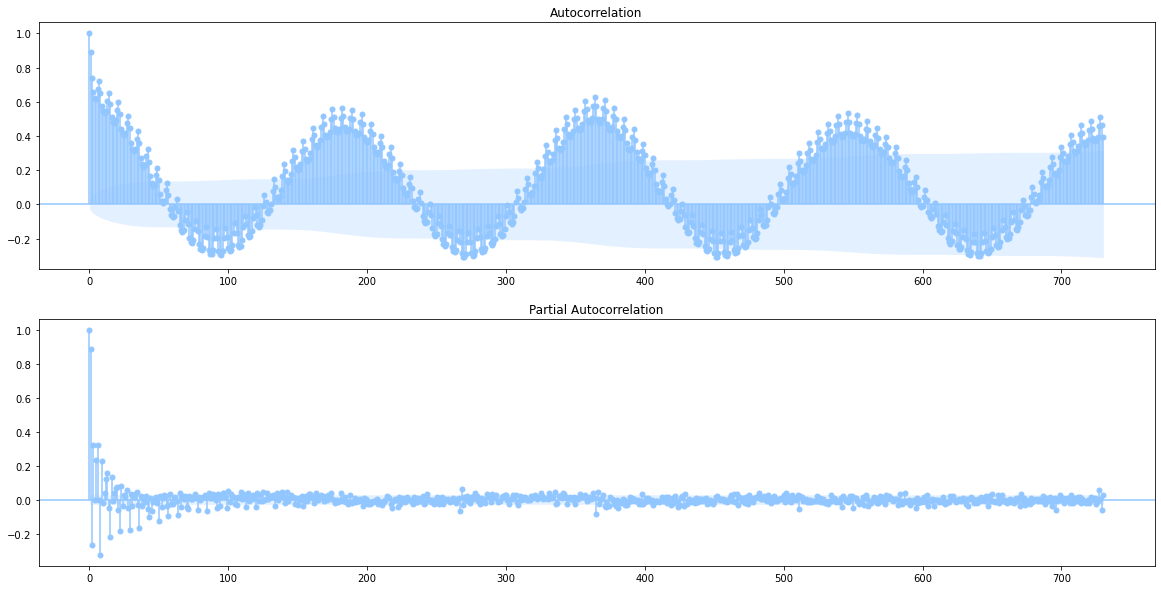

In [46]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(20,10))
plt.subplot(211)
plot_acf(df_feature_total_per_day['Total'].values, lags=(365*2), ax=plt.gca())
plt.subplot(212)
plot_pacf(df_feature_total_per_day['Total'].values, lags=(365*2), ax=plt.gca())
plt.show()

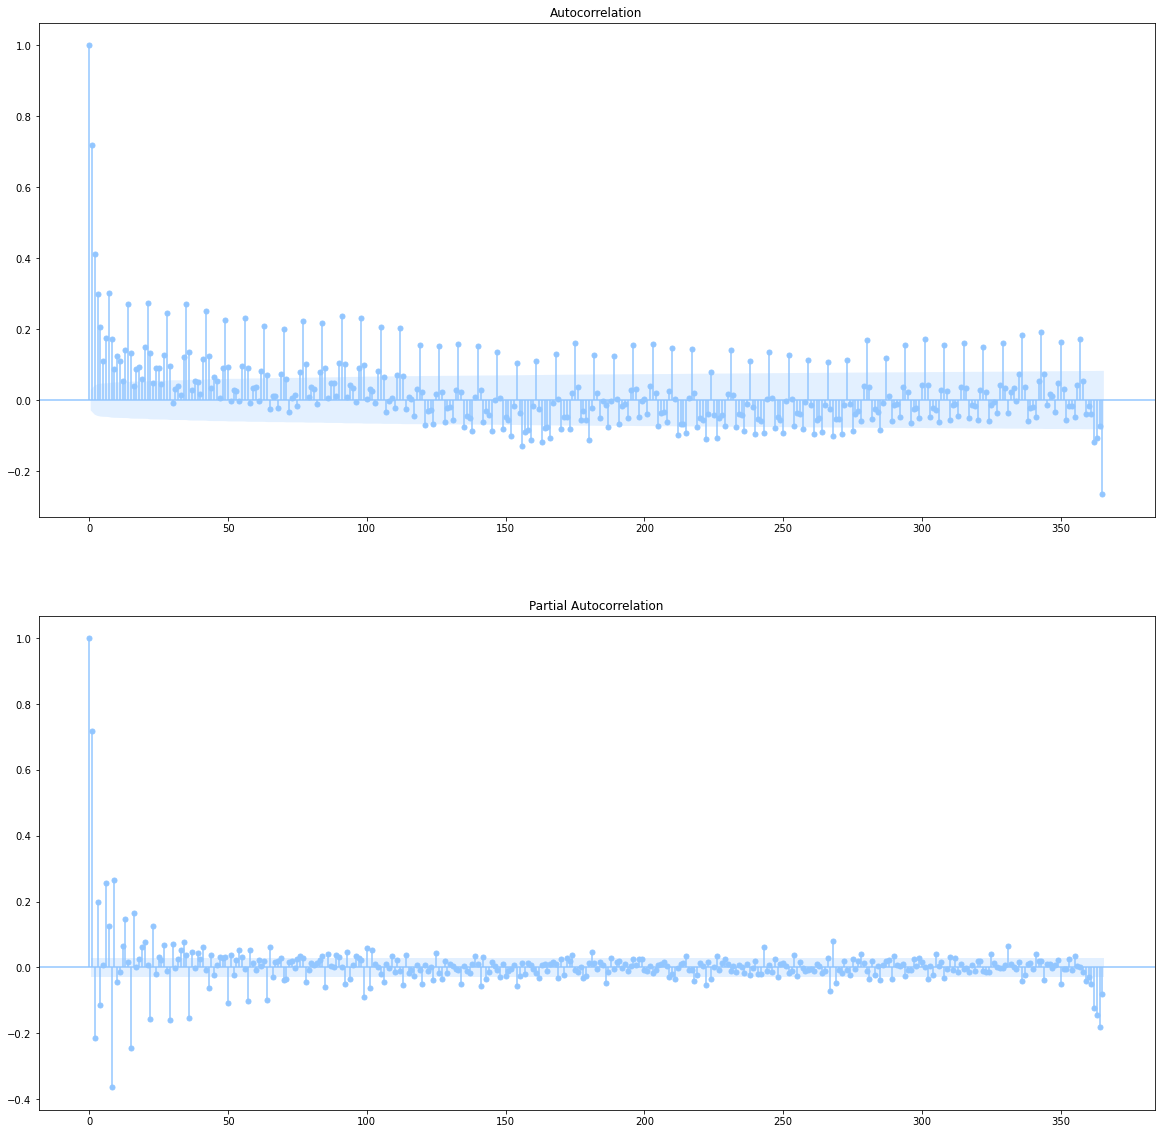

In [47]:
# Données sans saisonnalité

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(20,20))
plt.subplot(211)
plot_acf(df_feature_total_per_day_decompose['Total_without_seasonality'].values, lags=(365*1), ax=plt.gca())
plt.subplot(212)
plot_pacf(df_feature_total_per_day_decompose['Total_without_seasonality'].values, lags=(365*1), ax=plt.gca())
plt.show()

lags = 366 ou  365*2  => p et q difficiles à estimer 

<b>Intuition for ACF and PACF Plots</b>

Plots of the autocorrelation function and the partial autocorrelation function for a time series tell a very different story.

We can use the intuition for ACF and PACF above to explore some thought experiments.


<b>Autoregression Intuition</b>

Consider a time series that was generated by an autoregression (AR) process with a lag of k.

We know that the ACF describes the autocorrelation between an observation and another observation at a prior time step that includes direct and indirect dependence information.

This means we would expect the ACF for the AR(k) time series to be strong to a lag of k and the inertia of that relationship would carry on to subsequent lag values, trailing off at some point as the effect was weakened.

We know that the PACF only describes the direct relationship between an observation and its lag. This would suggest that there would be no correlation for lag values beyond k.

This is exactly the expectation of the ACF and PACF plots for an AR(k) process.


<b>Moving Average Intuition</b>

Consider a time series that was generated by a moving average (MA) process with a lag of k.

Remember that the moving average process is an autoregression model of the time series of residual errors from prior predictions. Another way to think about the moving average model is that it corrects future forecasts based on errors made on recent forecasts.

We would expect the ACF for the MA(k) process to show a strong correlation with recent values up to the lag of k, then a sharp decline to low or no correlation. By definition, this is how the process was generated.

For the PACF, we would expect the plot to show a strong relationship to the lag and a trailing off of correlation from the lag onwards.

Again, this is exactly the expectation of the ACF and PACF plots for an MA(k) process.

## Evaluation manuelle du modèle ARIMA

In [ ]:
# evaluate a manually configured ARIMA model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt

# prepare data
X = df_feature_total_per_day['Total'].values
X = X.astype('float32')

# Echantillons d'apprentissage et de test
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

# walk-forward validation
history = [x for x in train]
predictions = list()

for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(7,1,1))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
    
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=1886908.354, Expected=1874462.000
>Predicted=1862656.481, Expected=1918336.000
>Predicted=1944879.006, Expected=1924230.000
>Predicted=1880314.934, Expected=1883493.000
>Predicted=1759220.261, Expected=1720408.000
>Predicted=1681100.831, Expected=1675728.000
>Predicted=1792385.215, Expected=1868327.000
>Predicted=1914938.088, Expected=1881929.000
>Predicted=1879296.880, Expected=1881498.000
>Predicted=1891781.358, Expected=1901229.000
>Predicted=1887427.331, Expected=1946593.000
>Predicted=1858367.552, Expected=1876462.000
>Predicted=1830567.905, Expected=1808732.000
>Predicted=1884000.240, Expected=1996025.000
>Predicted=2023121.205, Expected=1968947.000
>Predicted=1915856.857, Expected=1964948.000
>Predicted=1979552.307, Expected=1947074.000
>Predicted=1952718.565, Expected=1907024.000
>Predicted=1849768.125, Expected=1828615.000
>Predicted=1802814.603, Expected=1781151.000
>Predicted=1889469.423, Expected=1940522.000
>Predicted=1956688.316, Expected=1930135.000
>Predicted

>Predicted=1920514.275, Expected=1888512.000
>Predicted=1891261.637, Expected=1892554.000
>Predicted=1881203.476, Expected=1882560.000
>Predicted=1781428.317, Expected=1739903.000
>Predicted=1714481.984, Expected=1710990.000
>Predicted=1899786.814, Expected=1985482.000
>Predicted=1989356.361, Expected=1964106.000
>Predicted=1895179.806, Expected=1932731.000
>Predicted=1940728.775, Expected=1912385.000
>Predicted=1894450.829, Expected=1878125.000
>Predicted=1786007.405, Expected=1789128.000
>Predicted=1777115.875, Expected=1689823.000
>Predicted=1820586.761, Expected=1904838.000
>Predicted=1944786.906, Expected=1965251.000
>Predicted=1944297.232, Expected=2035925.000
>Predicted=2030616.212, Expected=2128300.000
>Predicted=2099573.682, Expected=2098525.000
>Predicted=1985633.066, Expected=1835915.000
>Predicted=1716718.102, Expected=1719695.000
>Predicted=1858572.353, Expected=1954314.000
>Predicted=2020889.838, Expected=1963203.000
>Predicted=1966013.098, Expected=1938422.000
>Predicted

>Predicted=1949425.191, Expected=1913903.000
>Predicted=1891654.443, Expected=1918171.000
>Predicted=1846896.161, Expected=1717796.000
>Predicted=1636600.828, Expected=1672795.000
>Predicted=1814312.984, Expected=1910411.000
>Predicted=1961717.359, Expected=1923912.000
>Predicted=1898553.578, Expected=1938584.000
>Predicted=1941349.072, Expected=1941130.000
>Predicted=1938809.414, Expected=1888395.000
>Predicted=1752123.961, Expected=1731794.000
>Predicted=1710770.011, Expected=1733509.000
>Predicted=1873035.922, Expected=1939572.000
>Predicted=1965251.512, Expected=1841899.000
>Predicted=1803929.474, Expected=1921591.000
>Predicted=1978984.563, Expected=1949430.000
>Predicted=1903884.081, Expected=1960117.000
>Predicted=1866506.760, Expected=1868948.000
>Predicted=1853875.864, Expected=1834256.000
>Predicted=1919014.047, Expected=2085313.000
>Predicted=2067161.554, Expected=2154673.000
>Predicted=2150480.850, Expected=2162508.000
>Predicted=2117824.172, Expected=2134145.000
>Predicted

>Predicted=1928038.898, Expected=1930375.000
>Predicted=1817729.605, Expected=1735212.000
>Predicted=1674129.284, Expected=1713201.000
>Predicted=1836204.915, Expected=1927400.000
>Predicted=1969860.096, Expected=1929552.000
>Predicted=1902646.560, Expected=1924323.000
>Predicted=1943339.570, Expected=1903027.000
>Predicted=1890471.346, Expected=1872235.000
>Predicted=1762175.984, Expected=1679767.000
>Predicted=1659235.020, Expected=1627363.000
>Predicted=1767054.257, Expected=1869737.000
>Predicted=1928784.167, Expected=1893328.000
>Predicted=1866265.523, Expected=1918686.000
>Predicted=1925423.481, Expected=1886236.000
>Predicted=1857933.132, Expected=1850978.000
>Predicted=1737550.806, Expected=1672608.000
>Predicted=1632208.379, Expected=1615322.000
>Predicted=1759698.634, Expected=1856667.000
>Predicted=1915462.904, Expected=1895804.000
>Predicted=1884112.788, Expected=1904517.000
>Predicted=1891417.157, Expected=1918208.000
>Predicted=1904882.343, Expected=1928286.000
>Predicted

>Predicted=1769639.537, Expected=1753062.000
>Predicted=1716567.940, Expected=1705909.000
>Predicted=1820125.533, Expected=1936825.000
>Predicted=1996843.292, Expected=1957172.000
>Predicted=1924472.959, Expected=2017409.000
>Predicted=2045918.951, Expected=2082267.000
>Predicted=2035636.784, Expected=2082364.000
>Predicted=1968531.564, Expected=1932276.000
>Predicted=1856445.549, Expected=1789941.000
>Predicted=1881775.659, Expected=2015733.000
>Predicted=2071996.150, Expected=1996271.000
>Predicted=1977964.545, Expected=1983055.000
>Predicted=2024403.748, Expected=1954594.000
>Predicted=1962771.679, Expected=1910671.000
>Predicted=1834659.687, Expected=1757654.000
>Predicted=1695352.495, Expected=1794504.000
>Predicted=1973439.859, Expected=2101576.000
>Predicted=2120253.007, Expected=2063287.000
>Predicted=1997200.928, Expected=1990040.000
>Predicted=1968797.992, Expected=2006505.000
>Predicted=1996762.665, Expected=2094889.000
>Predicted=1999318.906, Expected=1953428.000
>Predicted

>Predicted=1705078.560, Expected=1628690.000
>Predicted=1752048.607, Expected=1881522.000
>Predicted=2010028.718, Expected=1885180.000
>Predicted=1901063.164, Expected=1906617.000
>Predicted=1898330.644, Expected=1935370.000
>Predicted=1889296.873, Expected=1895598.000
>Predicted=1796911.218, Expected=1711609.000
>Predicted=1638447.666, Expected=1654102.000
>Predicted=1810229.386, Expected=1885033.000
>Predicted=1918911.064, Expected=1957881.000
>Predicted=1955859.618, Expected=1987498.000
>Predicted=1989707.072, Expected=1932024.000
>Predicted=1886125.393, Expected=1874768.000
>Predicted=1768685.239, Expected=1708244.000
>Predicted=1664649.123, Expected=1651053.000
>Predicted=1786080.163, Expected=1861070.000
>Predicted=1943112.786, Expected=1894676.000
>Predicted=1888768.363, Expected=1908968.000
>Predicted=1898050.714, Expected=2026879.000
>Predicted=2031869.991, Expected=2011599.000
>Predicted=1864048.494, Expected=1793618.000
>Predicted=1718882.945, Expected=1749909.000
>Predicted

>Predicted=1845723.211, Expected=1950505.000
>Predicted=2038165.618, Expected=1946666.000
>Predicted=1901385.488, Expected=1975295.000
>Predicted=1975304.445, Expected=1965746.000
>Predicted=1931962.269, Expected=1920691.000
>Predicted=1807447.800, Expected=1749979.000
>Predicted=1718005.197, Expected=1673942.000
>Predicted=1813565.458, Expected=1932801.000
>Predicted=1991565.873, Expected=1929509.000
>Predicted=1906103.908, Expected=1921513.000
>Predicted=1927449.773, Expected=1957833.000
>Predicted=1952717.228, Expected=1995486.000
>Predicted=1888992.447, Expected=1923052.000
>Predicted=1863004.468, Expected=1909610.000
>Predicted=2025356.979, Expected=2064073.000
>Predicted=2045705.637, Expected=1974500.000
>Predicted=1919551.128, Expected=1944730.000
>Predicted=1974031.090, Expected=1989902.000
>Predicted=2017057.699, Expected=2033694.000
>Predicted=1981167.428, Expected=1960412.000
>Predicted=1939583.929, Expected=1834420.000
>Predicted=1895480.360, Expected=2028611.000
>Predicted

>Predicted=1962083.984, Expected=1879757.000
>Predicted=1825674.235, Expected=1924228.000
>Predicted=1954960.653, Expected=1971900.000
>Predicted=1953520.435, Expected=1951279.000
>Predicted=1825970.989, Expected=1805523.000
>Predicted=1744970.393, Expected=1708577.000
>Predicted=1833503.904, Expected=1914877.000
>Predicted=1940578.652, Expected=1904837.000
>Predicted=1896470.722, Expected=1883176.000
>Predicted=1908825.185, Expected=1866719.000
>Predicted=1865818.935, Expected=1848532.000
>Predicted=1778053.148, Expected=1686027.000
>Predicted=1632356.525, Expected=1655159.000
>Predicted=1804868.580, Expected=1937470.000
>Predicted=1982962.475, Expected=2014258.000
>Predicted=1967612.327, Expected=2030742.000
>Predicted=2004447.753, Expected=2064771.000
>Predicted=2033274.834, Expected=2130669.000
>Predicted=2006978.560, Expected=1930847.000
>Predicted=1829999.131, Expected=1926243.000
>Predicted=2076460.302, Expected=2233042.000
>Predicted=2273201.502, Expected=2167699.000
>Predicted

Autorégression (AR) : p = 7

Differences :         d = 1

Moyenne mobile (MA) : q = 1

=> RMSE = 116902



In [ ]:
# evaluate a manually configured ARIMA model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt

# prepare data
X = df_feature_total_per_day_decompose['Total_without_seasonality'].values
X = X.astype('float32')

# Echantillons d'apprentissage et de test
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

# walk-forward validation
history = [x for x in train]
predictions = list()

for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(7,1,1))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
    
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

#### Features historique par window

In [ ]:
# Nombre de jours de la Window
nb_jours_window = 30

# Création d'un tableau avec pour chaque ligne 
# l'historique de la consommation des nb_jours_window précédents et la consommation du lendemain 
# ==> [Total_j-nb_jours_window-1, ..., Total_j, Total_j+1]  

features = []
column_names = []
features_means = []
column_names_means = []

data_total = df_feature_total_per_day['Total'].copy()


for i in range(nb_jours_window,0,-1):
    shifted = data_total.shift(i)
    means = shifted.rolling(window=nb_jours_window).mean()
    # Features des Total_j
    features.append(shifted)
    column_names.append('Total_j-'+str(i-1))
    # Features des moyennes des  jours 
    features_means.append(means)
    column_names_means.append('mean_Total_j-'+str(i-1))
    

    
features.append(data_total)
column_names.append('Total_j+1')
df_features = pd.concat(features,axis=1)
df_features.columns = column_names

features_means.append(data_total)
column_names_means.append('Total_j+1')
df_features_means = pd.concat(features,axis=1)
df_features_means.columns = column_names_means


df_features.head(nb_jours_window+1)

In [ ]:
df_features = df_features[nb_jours_window:]
df_features.head()

In [ ]:
df_features_means = df_features[nb_jours_window:]
df_features_means.head()